# Early Childhood Care Selection in the Grand Toronto Area

## Contents
* [Introduction](#introduction)
* [Business problem](#businessproblem)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction
This project was motivated by my personal struggles as a young working mother looking for child care options for her one year old in a pre-pandemic world.

The purpose of the project is to help myself and young families moving into York Region of Ontario, Ontario in exploring and much better informed options for early learning and chicld care. My project aims to create an analysys of comprehensive features around child care for families coming to the region from within or outside Canada, in order to help them make smart and efficient decision on what's best for them and their young family members.

## Business problem
As I mentioned above, the reasoning behind me choosing this subject to explore and analyze was my personal experience. My husband and I decided to move to Markham, Ontario from another city in the province while I was still pregnant so that we have time- pre baby- to find the necessary facilities, services, amneties and know our soroundings before the the baby comes. As we are working parents with no grandparents to pitch in, we knew that once my maternity leave ended we had to have a plan in terms of child care. We found it insanely difficult to find and choose, more so that thh waiting lists are very long.

While York Region, of which the city of Markham is part, has a very comprehensive website and resource list, everything is very static and time consuming and quite some extensive analysis had to be done to find a list of child care options for our child in a prepandemic world. It was very hard to find information on daycare and other child care options in the city in such a way that it makes the decision process easy, efficent and result driven.

The main aim of my project analysis is to help the decision makin process less stressful and easier by providing a comprehensive, easy to follow list of child care options in Markham, Ontario, that can be used by new families either already living in the city or just moving in the city. The end result will need to have details on learning and care options, ratings, locations, reviews, programs included and fees, other amneties and dependencies.

# Data

## Data sources

Based on the business problem this project will use data from various sources in order to achieve it's desired result. The main data sources will be:

* Wikipedia list of Postal Codes in Canada, in order to identify cites and neighbourhoods in the Grand Toronto Area https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
* Geographical coordinates from http://cocl.us/Geospatial_data in order to find specific location of each city and neighbourhood
* Foursquare API for data on child care locations and user reviews
* City data on child care options : https://insights-york.opendata.arcgis.com/datasets/childrens-service/data 
* Provincial data on child care options in the province of Ontario : https://data.ontario.ca/dataset/licensed-child-care-facilities-in-ontario

Secondary data sets will be used for analysis purposes or partial scrapping where other data is not available. For example: 
* National data on child care options: https://www150.statcan.gc.ca/n1/pub/11f0019m/11f0019m2006284-eng.pdf
* York region child care programs and market rates : https://ww6.yorkmaps.ca/Html5Viewer24/Index.html?viewer=ChildrensServices.YorkMaps

# Methodology
## Exploratory data analysis

In [1]:
# First we import all necessary dependencies for the project
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install folium
import folium # map rendering library
import random
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from bs4 import BeautifulSoup
import csv

print('Libraries imported.')

     |████████████████████████████████| 102kB 12.1MB/s ta 0:00:01
Libraries imported.


In [109]:
# Get Postal codes for region of York
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_L'
response = requests.get(url)

#Process and convert html data
data = response.text
soup = BeautifulSoup(data,'html.parser')
table_wikipedia=soup.find('table')

#Create the pandas dataframe
gtaraw_df = pd.read_html(str(table_wikipedia))[0]
gtaraw_df.head()

0                            1                 2  \
0              L1APort Hope                 L2AFort Erie   L3ANot assigned   
1      L1BBowmanville(East)              L2BNot assigned  L3BWelland(East)   
2      L1CBowmanville(West)              L2CNot assigned  L3CWelland(West)   
3  L1ECourtice(Bowmanville)    L2ENiagara Falls(Central)   L3ENot assigned   
4        L1GOshawa(Central)  L2GNiagara Falls(Southeast)   L3GNot assigned   

                                                   3  \
0                                     L4AStouffville   
1                        L4BRichmond Hill(Southeast)   
2                        L4CRichmond Hill(Southwest)   
3  L4ERichmond Hill(Oak Ridges / Lake Wilcox / Te...   
4                                          L4GAurora   

                                                   4  \
0  L5AMississauga(Mississauga Valley / East Cooks...   
1  L5BMississauga(West Cooksville / Fairview / Ci...   
2  L5CMississauga(West Creditview / Mavis / Erind...   
3                   L5EMississauga(Central Lakeview)   
4  L5GMississauga(SW Lakeview / Mineola / East Po...   

                                                   5  \
0                                  L6AVaughan(Maple)   
1  L6BMarkham(Cornell, Ontario / Box Grove, Ontario)   
2   L6CMarkham(Berczy Village / Cachet / Angus Glen)   
3                         L6EMarkham(Wismer Commons)   
4      L6GMarkham(Downtown Markham / Markham Centre)   

                          6  \
0        L7ABrampton (West)   
1              L7BKing City   
2  L7CCaledon(Caledon East)   
3                 L7EBolton   
4             L7GGeorgetown   

                                                   7  \
0                                    L8ANot assigned   
1                             L8BHamilton(Waterdown)   
2                                    L8CNot assigned   
3  L8EHamilton(Confederation Park / Nashdale / Ea...   
4  L8GHamilton(Greenford / North Gershome / West ...   

                                                   8  
0  L9AHamilton(Crerar / Bruleville / Hill Park / ...  
1  L9BHamilton(Barnstown / West Chappel / Allison...  
2  L9CHamilton(Southam / Bonnington / Yeoville / ...  
3                                   L9EMilton(South)  
4                         L9GHamilton(Ancaster West)

In [105]:
gtaraw_df.shape

(20, 9)

In [111]:
# rename the columns generically so we can work with them easily
gtaraw_df.columns = ['c1','c2','c3','c4','c5','c6','c7','c8','c9']
gtaraw_df.head()

In [121]:
# Merge all columns into one as they have teh same info just weirdly distributed
gtaraw = pd.DataFrame({'c1': pd.concat([gtaraw_df.c1, gtaraw_df.c2,gtaraw_df.c3,gtaraw_df.c4,gtaraw_df.c5,gtaraw_df.c6,gtaraw_df.c7,gtaraw_df.c9,gtaraw_df.c9]), }).sort_index().reset_index(drop=True)
gtaraw.head()

In [123]:
# Split column one in two columns in order to extract the postal code in one column and the neighbourhoods and cities in another one
gtaraw[['d1','e1']] = gtaraw.c1.str.extract(r'(.{3})(.*)', expand=True)
gtaraw.head()

c1   d1  \
0                                       L1APort Hope  L1A   
1                                       L2AFort Erie  L2A   
2  L9AHamilton(Crerar / Bruleville / Hill Park / ...  L9A   
3  L9AHamilton(Crerar / Bruleville / Hill Park / ...  L9A   
4                                    L3ANot assigned  L3A   

                                                  e1  
0                                          Port Hope  
1                                          Fort Erie  
2  Hamilton(Crerar / Bruleville / Hill Park / Inc...  
3  Hamilton(Crerar / Bruleville / Hill Park / Inc...  
4                                       Not assigned

In [124]:
# extract the cities and split from neighbourhoods
gtaraw[['e1','f1']] = gtaraw['e1'].str.split('(',expand=True)
gtaraw.head()

c1   d1            e1  \
0                                       L1APort Hope  L1A     Port Hope   
1                                       L2AFort Erie  L2A     Fort Erie   
2  L9AHamilton(Crerar / Bruleville / Hill Park / ...  L9A      Hamilton   
3  L9AHamilton(Crerar / Bruleville / Hill Park / ...  L9A      Hamilton   
4                                    L3ANot assigned  L3A  Not assigned   

                                                  f1  
0                                               None  
1                                               None  
2  Crerar / Bruleville / Hill Park / Inch Park / ...  
3  Crerar / Bruleville / Hill Park / Inch Park / ...  
4                                               None

In [126]:
gtaraw.shape

(180, 4)

In [127]:
#drop the first column as it is no longer needed
gtaraw.drop(['c1'], axis=1, inplace=True)
gtaraw.head()

d1            e1                                                 f1
0  L1A     Port Hope                                               None
1  L2A     Fort Erie                                               None
2  L9A      Hamilton  Crerar / Bruleville / Hill Park / Inch Park / ...
3  L9A      Hamilton  Crerar / Bruleville / Hill Park / Inch Park / ...
4  L3A  Not assigned                                               None

In [183]:
#check how many different postal codes we have per city
gtaraw['e1'].value_counts()

Not assigned                         25
Mississauga                          23
Hamilton                             12
Brampton                              9
St. Catharines                        8
Markham                               7
Burlington                            7
Oakville                              5
Oshawa                                5
Richmond Hill                         4
Orangeville                           4
Pickering                             4
Niagara Falls                         4
Whitby                                4
Milton                                4
Barrie                                4
Ajax                                  3
Alliston                              2
Woodbridge                            2
Thornhill                             2
Wasaga Beach                          2
East Gwillimbury                      2
Newmarket                             2
Bowmanville                           2
Penetanguishene                       2


In [184]:
# I'll only keep Markham and the cities sorounding it as I have no interest in using a child care center that is more than 15 km away from my house.
gtaraw_df = gtaraw[(gtaraw.e1.isin(["Markham","Aurora","Vaughn","Stouffville","Newmarket","East Gwillimbury","Thornhill","Richmond Hill","Not Assigned"]))]
gtaraw_df.head()

d1             e1                                      f1
5   L4A    Stouffville                                    None
9   L4B  Richmond Hill                              Southeast)
17  L6B        Markham  Cornell, Ontario / Box Grove, Ontario)
18  L6C        Markham   Berczy Village / Cachet / Angus Glen)
19  L4C  Richmond Hill                              Southwest)

In [185]:
#Rename the columns names
gtaraw_df.columns = ['PostalCode','Borough','Neighborhood']
gtaraw_df.head()

PostalCode        Borough                            Neighborhood
5         L4A    Stouffville                                    None
9         L4B  Richmond Hill                              Southeast)
17        L6B        Markham  Cornell, Ontario / Box Grove, Ontario)
18        L6C        Markham   Berczy Village / Cachet / Angus Glen)
19        L4C  Richmond Hill                              Southwest)

In [186]:
gtaraw_df['Borough'].value_counts()

Markham             7
Richmond Hill       4
Thornhill           2
Newmarket           2
East Gwillimbury    2
Stouffville         1
Aurora              1
Name: Borough, dtype: int64

In [187]:
# Let's reset the index
gtaraw_df.reset_index(drop=True)

PostalCode           Borough                                 Neighborhood
0         L4A       Stouffville                                         None
1         L4B     Richmond Hill                                   Southeast)
2         L6B           Markham       Cornell, Ontario / Box Grove, Ontario)
3         L6C           Markham        Berczy Village / Cachet / Angus Glen)
4         L4C     Richmond Hill                                   Southwest)
5         L6E           Markham                              Wismer Commons)
6         L4E     Richmond Hill  Oak Ridges / Lake Wilcox / Temperanceville)
7         L4G            Aurora                                         None
8         L6G           Markham           Downtown Markham / Markham Centre)
9         L4J         Thornhill                                        West)
10        L9N  East Gwillimbury          Holland Landing / River Drive Park)
11        L9N  East Gwillimbury          Holland Landing / River Drive Park)
12        L3P           Markham                                     Central)
13        L3R           Markham                             Outer Southwest)
14        L3S           Markham       Armadale, Ontario / Milliken, Ontario)
15        L4S     Richmond Hill                                     Central)
16        L3T         Thornhill                                        East)
17        L3X         Newmarket                                   Southwest)
18        L3Y         Newmarket                                   Northeast)

In [188]:
gtaraw_df.shape

(19, 3)

In [189]:
gtaraw_df.describe()

PostalCode  Borough Neighborhood
count          19       19           17
unique         18        7           14
top           L9N  Markham   Southwest)
freq            2        7            2

In [190]:
# save the dataset into a file we can use later
gtaraw_df.to_csv('GTA_RAW.csv')
print('First data Set from WIkipedia saved')

First data Set from WIkipedia saved


In [ ]:
!pip install geocoder
import geocoder

### Getting location data

In [198]:
# Let's get location information using geocoder
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Markham, Ontario'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('L4A',)

[43.85651000000007, -79.33981999999997]

In [200]:
#retrieving postal code coordinates
postal_codes = gtaraw_df[['PostalCode']]
postal_codes.head()

PostalCode
5         L4A
9         L4B
17        L6B
18        L6C
19        L4C

In [203]:
coords = [ get_latilong(postal_code) for postal_code in postal_codes.values.tolist() ]

In [205]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
gtaraw_df['Latitude'] = df_coords['Latitude']
gtaraw_df['Longitude'] = df_coords['Longitude']

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [207]:
gtaraw_df

PostalCode           Borough                                 Neighborhood  \
5          L4A       Stouffville                                         None   
9          L4B     Richmond Hill                                   Southeast)   
17         L6B           Markham       Cornell, Ontario / Box Grove, Ontario)   
18         L6C           Markham        Berczy Village / Cachet / Angus Glen)   
19         L4C     Richmond Hill                                   Southwest)   
33         L6E           Markham                              Wismer Commons)   
35         L4E     Richmond Hill  Oak Ridges / Lake Wilcox / Temperanceville)   
36         L4G            Aurora                                         None   
37         L6G           Markham           Downtown Markham / Markham Centre)   
58         L4J         Thornhill                                        West)   
90         L9N  East Gwillimbury          Holland Landing / River Drive Park)   
98         L9N  East Gwillimbury          Holland Landing / River Drive Park)   
106        L3P           Markham                                     Central)   
116        L3R           Markham                             Outer Southwest)   
121        L3S           Markham       Armadale, Ontario / Milliken, Ontario)   
123        L4S     Richmond Hill                                     Central)   
126        L3T         Thornhill                                        East)   
157        L3X         Newmarket                                   Southwest)   
170        L3Y         Newmarket                                   Northeast)   

     Latitude  Longitude  
5    43.89975  -79.26621  
9    43.85651  -79.33982  
17   43.85651  -79.33982  
18   43.85651  -79.33982  
19        NaN        NaN  
33        NaN        NaN  
35        NaN        NaN  
36        NaN        NaN  
37        NaN        NaN  
58        NaN        NaN  
90        NaN        NaN  
98        NaN        NaN  
106       NaN        NaN  
116       NaN        NaN  
121       NaN        NaN  
123       NaN        NaN  
126       NaN        NaN  
157       NaN        NaN  
170       NaN        NaN

As expected, geocoder does not seem to work properly hence I'll use coordinates for the postal codes uploaded separately and captured via other methods.

In [208]:
#load the previously saved file with cities
gtaraw_df = pd.read_csv('GTA_RAW.csv')
gtaraw_df.head()

Unnamed: 0 PostalCode        Borough  \
0           5        L4A    Stouffville   
1           9        L4B  Richmond Hill   
2          17        L6B        Markham   
3          18        L6C        Markham   
4          19        L4C  Richmond Hill   

                             Neighborhood  
0                                     NaN  
1                              Southeast)  
2  Cornell, Ontario / Box Grove, Ontario)  
3   Berczy Village / Cachet / Angus Glen)  
4                              Southwest)

In [209]:
gtaraw_df.drop(gtaraw_df.columns[0], axis=1, inplace=True)
gtaraw_df.head()

PostalCode        Borough                            Neighborhood
0        L4A    Stouffville                                     NaN
1        L4B  Richmond Hill                              Southeast)
2        L6B        Markham  Cornell, Ontario / Box Grove, Ontario)
3        L6C        Markham   Berczy Village / Cachet / Angus Glen)
4        L4C  Richmond Hill                              Southwest)

In [211]:
# Get location data from extranal sources
url='https://gist.github.com/488fbbc998d0babd500b45f709661c15'
response = requests.get(url)

#Process and convert html data
data = response.text
soup = BeautifulSoup(data,'html.parser')
table_wikipedia=soup.find('table')

#Create the pandas dataframe
geolocation_df = pd.read_html(str(table_wikipedia))[0]
geolocation_df.head()

Unnamed: 0 Postal Code  Latitude  Longitude
0         NaN         L4A   43.8687   -79.2254
1         NaN         L4B   43.8584   -79.3916
2         NaN         L6B   43.8687   -79.2254
3         NaN         L6C   43.8783   -79.3522
4         NaN         L4C   43.8815   -79.4366

In [220]:
#remove the unnecessary  column
geolocation_df.drop(geolocation_df.columns[0], axis=1, inplace=True)
geolocation_df.head()

Postal Code  Latitude  Longitude
1         L4B   43.8584   -79.3916
2         L6B   43.8687   -79.2254
3         L6C   43.8783   -79.3522
4         L4C   43.8815   -79.4366
5         L6E   43.8992   -79.2733

In [221]:
#Rename the columns 
geolocation_df.columns = ['PostalCode','Latitude','Longitude']
geolocation_df.head()

PostalCode  Latitude  Longitude
1        L4B   43.8584   -79.3916
2        L6B   43.8687   -79.2254
3        L6C   43.8783   -79.3522
4        L4C   43.8815   -79.4366
5        L6E   43.8992   -79.2733

In [222]:
# Now we merge the 2 datasets by PostalCode
gtaraw_df = pd.merge(gtaraw_df, geolocation_df, on = "PostalCode")
gtaraw_df.head()

PostalCode        Borough                            Neighborhood  Latitude  \
0        L4B  Richmond Hill                              Southeast)   43.8584   
1        L6B        Markham  Cornell, Ontario / Box Grove, Ontario)   43.8687   
2        L6C        Markham   Berczy Village / Cachet / Angus Glen)   43.8783   
3        L4C  Richmond Hill                              Southwest)   43.8815   
4        L6E        Markham                         Wismer Commons)   43.8992   

   Longitude  
0   -79.3916  
1   -79.2254  
2   -79.3522  
3   -79.4366  
4   -79.2733

In [223]:
#Save the new dataset
gtaraw_df.to_csv('GTA_RAW_GEO.csv', index=False)
print('Data set with geolocation data is now saved!')

Data set with geolocation data is now saved!


In [19]:
# Get geographic coordinates for York region
address = 'York Region,Ontario'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of York Region are {}, {}.'.format(latitude_x, longitude_y))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The Geograpical Co-ordinate of York Region are 44.0007518, -79.4372217.


In [224]:
#Print Yor region Map
map_YorkR = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(gtaraw_df3['Latitude'], gtaraw_df3['Longitude'], gtaraw_df3['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_YorkR)  
    
map_YorkR

#### Get data from York region

In [20]:
# I'll get the provincial child care data related to licensed child care facilities
prov_df=pd.read_excel('https://data.ontario.ca/dataset/7efd8b4b-cc63-4337-a551-c940a346605b/resource/d2144297-fc60-4472-b954-e577d1f1a3fb/download/child_care_facilities_open_data_feb2020.xlsx')
prov_df.head()

Report Snapshot Date                                      Licensee Name  \
0           2020-02-29  002350227 Ontario Inc. (Creative Minds Childre...   
1           2020-02-29  002350227 Ontario Inc. (Creative Minds Childre...   
2           2020-02-29                             002599266 Ontario INC.   
3           2020-02-29                      002633409 Ontario Corporation   
4           2020-02-29  1.2.3. Look At Me Co-operative Nursery School ...   

   Program Type Desc  Region Display Name                  CMSM DSSAB Name  \
0  Child Care Centre     Southwest Region                City of Brantford   
1  Child Care Centre     Southwest Region                City of Brantford   
2  Child Care Centre  Central East Region  Regional Municipality of Durham   
3  Child Care Centre          West Region  Regional Municipality of Halton   
4  Child Care Centre     Southwest Region                City of Stratford   

                          Child Care Center Name Licence Number  \
0               Creative Minds Children Services        0006463   
1           Creative Minds children services inc          56690   
2           Durham Montessori School and Daycare          57087   
3             Western Heights Montessori Academy          57245   
4  1.2.3. LOOK AT ME CO-OPERATIVE NURSERY SCHOOL          14085   

                         Program Option Original Issue Date Licence Status  \
0    Full Day(6 hours or more in a day)          2013-04-15       Inactive   
1    Full Day(6 hours or more in a day)          2016-11-24         Active   
2    Full Day(6 hours or more in a day)          2018-01-08         Active   
3    Full Day(6 hours or more in a day)          2018-08-10         Active   
4  Half day(Less than 6 hours in a day)          1991-12-05         Active   

  Closure or Termination Date Language of Service Desc Street Number  \
0                         NaT                  English            61   
1                         NaT                  English             5   
2                         NaT                  English           200   
3                         NaT          English, French           186   
4                         NaT                  English           465   

   Street Name Street Type           City Province Postal Code  
0     Sherwood       Drive      Brantford       ON     N3T 1N7  
1         wade      Avenue  Brantford, On       ON     N3T 1W8  
2        Byron      Street         Whitby       ON     L1N 4P6  
3  Morrison Rd         NaN       Oakville       ON     L4J 4J4  
4     Maitland      Avenue       Listowel       ON     N4W 2M7

I'll drop a few columns as they are of no use to what the project is meant to achieve.

In [21]:
# Dropping unnecessary columns
prov_df.drop(['Report Snapshot Date', 'Licensee Name', 'Licence Number', "Original Issue Date", "Closure or Termination Date", 'Street Number', 'Street Name', 'Street Type', 'Province'], axis=1, inplace=True)
prov_df.head()

Program Type Desc  Region Display Name                  CMSM DSSAB Name  \
0  Child Care Centre     Southwest Region                City of Brantford   
1  Child Care Centre     Southwest Region                City of Brantford   
2  Child Care Centre  Central East Region  Regional Municipality of Durham   
3  Child Care Centre          West Region  Regional Municipality of Halton   
4  Child Care Centre     Southwest Region                City of Stratford   

                          Child Care Center Name  \
0               Creative Minds Children Services   
1           Creative Minds children services inc   
2           Durham Montessori School and Daycare   
3             Western Heights Montessori Academy   
4  1.2.3. LOOK AT ME CO-OPERATIVE NURSERY SCHOOL   

                         Program Option Licence Status  \
0    Full Day(6 hours or more in a day)       Inactive   
1    Full Day(6 hours or more in a day)         Active   
2    Full Day(6 hours or more in a day)         Active   
3    Full Day(6 hours or more in a day)         Active   
4  Half day(Less than 6 hours in a day)         Active   

  Language of Service Desc           City Postal Code  
0                  English      Brantford     N3T 1N7  
1                  English  Brantford, On     N3T 1W8  
2                  English         Whitby     L1N 4P6  
3          English, French       Oakville     L4J 4J4  
4                  English       Listowel     N4W 2M7

I am only interested in active facilities in the province so I will drop all rows that have Inactive ones.

In [22]:
# Drop all rows that have Licence Status as inactive
# Get names of indexes for which column Licence status has value Inactive
index_names = prov_df[ prov_df['Licence Status'] == 'Inactive' ].index 
  
# drop these row indexes from dataFrame 
prov_df.drop(index_names, inplace = True) 
prov_df.head()

Program Type Desc  Region Display Name                  CMSM DSSAB Name  \
1  Child Care Centre     Southwest Region                City of Brantford   
2  Child Care Centre  Central East Region  Regional Municipality of Durham   
3  Child Care Centre          West Region  Regional Municipality of Halton   
4  Child Care Centre     Southwest Region                City of Stratford   
5  Child Care Centre         North Region                   County of Grey   

                          Child Care Center Name  \
1           Creative Minds children services inc   
2           Durham Montessori School and Daycare   
3             Western Heights Montessori Academy   
4  1.2.3. LOOK AT ME CO-OPERATIVE NURSERY SCHOOL   
5                 100 Acre Wood Forest Preschool   

                         Program Option Licence Status  \
1    Full Day(6 hours or more in a day)         Active   
2    Full Day(6 hours or more in a day)         Active   
3    Full Day(6 hours or more in a day)         Active   
4  Half day(Less than 6 hours in a day)         Active   
5    Full Day(6 hours or more in a day)         Active   

  Language of Service Desc           City Postal Code  
1                  English  Brantford, On     N3T 1W8  
2                  English         Whitby     L1N 4P6  
3          English, French       Oakville     L4J 4J4  
4                  English       Listowel     N4W 2M7  
5                  English      Heathcote     N0H 1N0

In [23]:
prov_df.shape

(5697, 9)

I am only interested in child care options in York region so I'll go ahead and filter out all the rest of the regions.

In [24]:
#Rename the columns names for ease of use 
prov_df.columns = ['ProgramType','Region','CMSM','ChildCareCenterName','ProgramType', 'Status', 'ServiceLang', 'City', 'PostalCode']
#drop Status column as it is redundant, we already filtered out the Inactive facilities
prov_df.drop(['Status'], axis=1, inplace=True)

prov_df.head()

ProgramType               Region                             CMSM  \
1  Child Care Centre     Southwest Region                City of Brantford   
2  Child Care Centre  Central East Region  Regional Municipality of Durham   
3  Child Care Centre          West Region  Regional Municipality of Halton   
4  Child Care Centre     Southwest Region                City of Stratford   
5  Child Care Centre         North Region                   County of Grey   

                             ChildCareCenterName  \
1           Creative Minds children services inc   
2           Durham Montessori School and Daycare   
3             Western Heights Montessori Academy   
4  1.2.3. LOOK AT ME CO-OPERATIVE NURSERY SCHOOL   
5                 100 Acre Wood Forest Preschool   

                            ProgramType      ServiceLang           City  \
1    Full Day(6 hours or more in a day)          English  Brantford, On   
2    Full Day(6 hours or more in a day)          English         Whitby   
3    Full Day(6 hours or more in a day)  English, French       Oakville   
4  Half day(Less than 6 hours in a day)          English       Listowel   
5    Full Day(6 hours or more in a day)          English      Heathcote   

  PostalCode  
1    N3T 1W8  
2    L1N 4P6  
3    L4J 4J4  
4    N4W 2M7  
5    N0H 1N0

In [25]:
prov_df=prov_df[prov_df['CMSM'].str.contains('York')]
prov_df.shape

(565, 8)

I'll drop 2 more columns as they have just become redundant

In [26]:
#Drop Regiona and CMSM
prov_df.drop(['Region', 'CMSM'], axis=1, inplace=True)
prov_df.head()

ProgramType                                ChildCareCenterName  \
6   Child Care Centre                                 CUTIES & PATOOTIES   
7   Child Care Centre              Cuties and Patooties Childcare Center   
9   Child Care Centre  Eh to Zed Preschool Canada Early Learning Academy   
12  Child Care Centre   1043282 Ontario Inc. - Markham Montessori School   
18  Child Care Centre                               Kids Can Doodle Inc.   

                                          ProgramType ServiceLang  \
6                  Full Day(6 hours or more in a day)     English   
7                  Full Day(6 hours or more in a day)     English   
9   Full Day(6 hours or more in a day), Half day(L...     English   
12  Full Day(6 hours or more in a day), Half day(L...     English   
18  Full Day(6 hours or more in a day), Half day(L...     English   

             City PostalCode  
6       Newmarket    L3X 1V6  
7       newmarket    L3X 1V6  
9          AURORA    L4G 8A3  
12        Markham    L3P 2B2  
18  Richmond Hill    L4C 2M6

I think we got the provincial data in a good shape to move forward with saving it for later use and move to the next data source we need to analyze.

In [27]:
prov_df.to_csv('Provincial_data.csv')
print('Final Provincial data is now saved.')

Final Provincial data is now saved.


# Get data from York region to complement what we already have

In [28]:
#Define the URL and Send the GET Request and examine the results
url = 'https://opendata.arcgis.com/datasets/2794d7a5d9134afbad072a70e9570667_3.geojson'
results = requests.get(url).json()
results

{'type': 'FeatureCollection',
 'name': 'Children_s_Service',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1,
    'PROVIDDISP': 'EH TO01',
    'PNT_GIS_ID': 246644,
    'NAME': 'Eh to Zed Preschool Canada Early Learning Academy',
    'ORG_NAME': '10151513 Canada Corp.',
    'FULL_ADDRESS': '108 Hollidge Boulevard',
    'UNIT_NUMBER': '',
    'COMMUNITY': 'Aurora',
    'MUNICIPALITY': 'Aurora',
    'POSTAL_CODE': 'L4G 8A3',
    'MAIN_INTERSECTION': 'Bayview Avenue & St. Johns Sideroad',
    'CATEGORY': 'Child Care Centre',
    'PHONE_NO': '(905) 900-0487',
    'PHONE_EXT': '',
    'TYPE': 'Centre Based Child Care',
    'PROGRAM_DETAILS': None},
   'geometry': {'type': 'Point',
    'coordinates': [-79.4488661851001, 44.01220310537782]}},
  {'type': 'Feature',
   'properties': {'OBJECTID': 2,
    'PROVIDDISP': 'KIDZ 04',
    'PNT_GIS_ID': 115343,
    'NAME': 'Kidz World Childcare Centre 

In [29]:
#Get relevant part of JSON and transform it into a pandas dataframe
# assign relevant part of JSON to vyork
vyork = results['features']

# tranform venues into a dataframe
york_dff = json_normalize(vyork)
york_dff.head()

geometry.coordinates geometry.type properties.CATEGORY  \
0    [-79.4488661851001, 44.01220310537782]         Point   Child Care Centre   
1   [-79.43257184289833, 43.84674818428962]         Point   Child Care Centre   
2   [-79.52108811173954, 43.83480034795726]         Point   Child Care Centre   
3    [-79.5499349257228, 43.80632258106177]         Point   Child Care Centre   
4  [-79.43450391807569, 44.078880734501396]         Point   Child Care Centre   

  properties.COMMUNITY properties.FULL_ADDRESS  \
0               Aurora  108 Hollidge Boulevard   
1        Richmond Hill          6 Scott Drive    
2              Vaughan  2620 Rutherford Road,    
3           Woodbridge       8383 Weston Road    
4            Newmarket   18075 Leslie Street,    

          properties.MAIN_INTERSECTION properties.MUNICIPALITY  \
0  Bayview Avenue & St. Johns Sideroad                  Aurora   
1       Yonge Street & Rutherford Road           Richmond Hill   
2      Melville Road & Rutherford Road                 Vaughan   
3         Highway 400 & Langstaff Road                 Vaughan   
4                  Leslie & Green Lane               Newmarket   

                                     properties.NAME  properties.OBJECTID  \
0  Eh to Zed Preschool Canada Early Learning Academy                    1   
1        Kidz World Childcare Centre - Richmond Hill                    2   
2                          Goodness Childcare Centre                    3   
3      Learning Jungle School - Vaughan South Campus                    4   
4                          Safari Kid East Newmarket                    5   

     properties.ORG_NAME properties.PHONE_EXT properties.PHONE_NO  \
0  10151513 Canada Corp.                           (905) 900-0487   
1   2046508 Ontario Inc.                           (905) 881-2713   
2   2411544 Ontario Inc.                           (905) 553-8900   
3   2490995 Ontario Inc.                           (905) 856-9909   
4   2580123 Ontario Inc.                           (905) 830-1551   

   properties.PNT_GIS_ID properties.POSTAL_CODE properties.PROGRAM_DETAILS  \
0                 246644                L4G 8A3                       None   
1                 115343                L4C 6V6                       None   
2                 392134                L4K 0H1                       None   
3                 223582                L4L 1A6                       None   
4                 350522                L3Y 9A4                       None   

  properties.PROVIDDISP          properties.TYPE properties.UNIT_NUMBER  \
0               EH TO01  Centre Based Child Care                          
1               KIDZ 04  Centre Based Child Care               Unit 101   
2               GOODN01  Centre Based Child Care               Unit 101   
3               LEARN03  Centre Based Child Care               Unit 113   
4               SAFAR20  Centre Based Child Care                 Unit 5   

      type  
0  Feature  
1  Feature  
2  Feature  
3  Feature  
4  Feature

In [30]:
york_dff.shape

(611, 19)

In [31]:
# Dropping unnecessary columns
york_dff.drop(['geometry.coordinates','geometry.type', 'properties.CATEGORY','properties.FULL_ADDRESS', 'properties.MAIN_INTERSECTION', "properties.MUNICIPALITY", "properties.OBJECTID", 'properties.ORG_NAME', 'properties.PHONE_EXT', 'properties.PNT_GIS_ID', 'properties.PROVIDDISP','properties.UNIT_NUMBER','type'], axis=1, inplace=True)
york_dff.head()

properties.COMMUNITY                                    properties.NAME  \
0               Aurora  Eh to Zed Preschool Canada Early Learning Academy   
1        Richmond Hill        Kidz World Childcare Centre - Richmond Hill   
2              Vaughan                          Goodness Childcare Centre   
3           Woodbridge      Learning Jungle School - Vaughan South Campus   
4            Newmarket                          Safari Kid East Newmarket   

  properties.PHONE_NO properties.POSTAL_CODE properties.PROGRAM_DETAILS  \
0      (905) 900-0487                L4G 8A3                       None   
1      (905) 881-2713                L4C 6V6                       None   
2      (905) 553-8900                L4K 0H1                       None   
3      (905) 856-9909                L4L 1A6                       None   
4      (905) 830-1551                L3Y 9A4                       None   

           properties.TYPE  
0  Centre Based Child Care  
1  Centre Based Child Care  
2  Centre Based Child Care  
3  Centre Based Child Care  
4  Centre Based Child Care

In [32]:
#Rename the columns names for ease of use 
york_dff.columns = ['City','ChildCareCenterName', 'Phone_no', 'PostalCode', 'ProgramDetails', 'ProgramType']
york_dff.head()

City                                ChildCareCenterName  \
0         Aurora  Eh to Zed Preschool Canada Early Learning Academy   
1  Richmond Hill        Kidz World Childcare Centre - Richmond Hill   
2        Vaughan                          Goodness Childcare Centre   
3     Woodbridge      Learning Jungle School - Vaughan South Campus   
4      Newmarket                          Safari Kid East Newmarket   

         Phone_no PostalCode ProgramDetails              ProgramType  
0  (905) 900-0487    L4G 8A3           None  Centre Based Child Care  
1  (905) 881-2713    L4C 6V6           None  Centre Based Child Care  
2  (905) 553-8900    L4K 0H1           None  Centre Based Child Care  
3  (905) 856-9909    L4L 1A6           None  Centre Based Child Care  
4  (905) 830-1551    L3Y 9A4           None  Centre Based Child Care

In [33]:
# Merge the last two data sets obtained, by postal code
#Laod the last provincial data I saved
york_df4 = pd.read_csv('Provincial_data.csv')
york_df4.head()

Unnamed: 0        ProgramType  \
0           6  Child Care Centre   
1           7  Child Care Centre   
2           9  Child Care Centre   
3          12  Child Care Centre   
4          18  Child Care Centre   

                                 ChildCareCenterName  \
0                                 CUTIES & PATOOTIES   
1              Cuties and Patooties Childcare Center   
2  Eh to Zed Preschool Canada Early Learning Academy   
3   1043282 Ontario Inc. - Markham Montessori School   
4                               Kids Can Doodle Inc.   

                                       ProgramType.1 ServiceLang  \
0                 Full Day(6 hours or more in a day)     English   
1                 Full Day(6 hours or more in a day)     English   
2  Full Day(6 hours or more in a day), Half day(L...     English   
3  Full Day(6 hours or more in a day), Half day(L...     English   
4  Full Day(6 hours or more in a day), Half day(L...     English   

            City PostalCode  
0      Newmarket    L3X 1V6  
1      newmarket    L3X 1V6  
2         AURORA    L4G 8A3  
3        Markham    L3P 2B2  
4  Richmond Hill    L4C 2M6

In [34]:
# Now we merge the 2 datasets by PostalCode
york_df4 = pd.merge(york_df4, york_dff, on = "PostalCode")
york_df4.head()

Unnamed: 0      ProgramType_x  \
0           6  Child Care Centre   
1           7  Child Care Centre   
2           9  Child Care Centre   
3          12  Child Care Centre   
4          18  Child Care Centre   

                               ChildCareCenterName_x  \
0                                 CUTIES & PATOOTIES   
1              Cuties and Patooties Childcare Center   
2  Eh to Zed Preschool Canada Early Learning Academy   
3   1043282 Ontario Inc. - Markham Montessori School   
4                               Kids Can Doodle Inc.   

                                       ProgramType.1 ServiceLang  \
0                 Full Day(6 hours or more in a day)     English   
1                 Full Day(6 hours or more in a day)     English   
2  Full Day(6 hours or more in a day), Half day(L...     English   
3  Full Day(6 hours or more in a day), Half day(L...     English   
4  Full Day(6 hours or more in a day), Half day(L...     English   

          City_x PostalCode         City_y  \
0      Newmarket    L3X 1V6      Newmarket   
1      newmarket    L3X 1V6      Newmarket   
2         AURORA    L4G 8A3         Aurora   
3        Markham    L3P 2B2        Markham   
4  Richmond Hill    L4C 2M6  Richmond Hill   

                               ChildCareCenterName_y        Phone_no  \
0                               Cuties and Patooties  (905) 252-7833   
1                               Cuties and Patooties  (905) 252-7833   
2  Eh to Zed Preschool Canada Early Learning Academy  (905) 900-0487   
3                          Markham Montessori School  (905) 294-3373   
4                                    Kids Can Doodle  (905) 770-7417   

                                      ProgramDetails            ProgramType_y  
0                                               None  Centre Based Child Care  
1                                               None  Centre Based Child Care  
2                                               None  Centre Based Child Care  
3                                               None  Centre Based Child Care  
4  *  Open from 7:00 a.m. to 6:30 p.m.; located n...  Centre Based Child Care

In [35]:
york_df4.drop(york_df4.columns[0], axis=1, inplace=True)
york_df4.head()

ProgramType_x                              ChildCareCenterName_x  \
0  Child Care Centre                                 CUTIES & PATOOTIES   
1  Child Care Centre              Cuties and Patooties Childcare Center   
2  Child Care Centre  Eh to Zed Preschool Canada Early Learning Academy   
3  Child Care Centre   1043282 Ontario Inc. - Markham Montessori School   
4  Child Care Centre                               Kids Can Doodle Inc.   

                                       ProgramType.1 ServiceLang  \
0                 Full Day(6 hours or more in a day)     English   
1                 Full Day(6 hours or more in a day)     English   
2  Full Day(6 hours or more in a day), Half day(L...     English   
3  Full Day(6 hours or more in a day), Half day(L...     English   
4  Full Day(6 hours or more in a day), Half day(L...     English   

          City_x PostalCode         City_y  \
0      Newmarket    L3X 1V6      Newmarket   
1      newmarket    L3X 1V6      Newmarket   
2         AURORA    L4G 8A3         Aurora   
3        Markham    L3P 2B2        Markham   
4  Richmond Hill    L4C 2M6  Richmond Hill   

                               ChildCareCenterName_y        Phone_no  \
0                               Cuties and Patooties  (905) 252-7833   
1                               Cuties and Patooties  (905) 252-7833   
2  Eh to Zed Preschool Canada Early Learning Academy  (905) 900-0487   
3                          Markham Montessori School  (905) 294-3373   
4                                    Kids Can Doodle  (905) 770-7417   

                                      ProgramDetails            ProgramType_y  
0                                               None  Centre Based Child Care  
1                                               None  Centre Based Child Care  
2                                               None  Centre Based Child Care  
3                                               None  Centre Based Child Care  
4  *  Open from 7:00 a.m. to 6:30 p.m.; located n...  Centre Based Child Care

In [36]:
york_df4.drop(['ProgramType_x','City_x','ChildCareCenterName_x'], axis=1, inplace=True)
york_df4.head()

ProgramType.1 ServiceLang PostalCode  \
0                 Full Day(6 hours or more in a day)     English    L3X 1V6   
1                 Full Day(6 hours or more in a day)     English    L3X 1V6   
2  Full Day(6 hours or more in a day), Half day(L...     English    L4G 8A3   
3  Full Day(6 hours or more in a day), Half day(L...     English    L3P 2B2   
4  Full Day(6 hours or more in a day), Half day(L...     English    L4C 2M6   

          City_y                              ChildCareCenterName_y  \
0      Newmarket                               Cuties and Patooties   
1      Newmarket                               Cuties and Patooties   
2         Aurora  Eh to Zed Preschool Canada Early Learning Academy   
3        Markham                          Markham Montessori School   
4  Richmond Hill                                    Kids Can Doodle   

         Phone_no                                     ProgramDetails  \
0  (905) 252-7833                                               None   
1  (905) 252-7833                                               None   
2  (905) 900-0487                                               None   
3  (905) 294-3373                                               None   
4  (905) 770-7417  *  Open from 7:00 a.m. to 6:30 p.m.; located n...   

             ProgramType_y  
0  Centre Based Child Care  
1  Centre Based Child Care  
2  Centre Based Child Care  
3  Centre Based Child Care  
4  Centre Based Child Care

In [37]:
york_df4.shape

(661, 8)

In [38]:
#get a list of all column names
cols = list(york_df4.columns.values)
cols

['ProgramType.1',
 'ServiceLang',
 'PostalCode',
 'City_y',
 'ChildCareCenterName_y',
 'Phone_no',
 'ProgramDetails',
 'ProgramType_y']

In [39]:
#rearranging the columns and modifying the names a bit
york_df4=york_df4[['ChildCareCenterName_y','ProgramType.1','ProgramType_y','ProgramDetails','ServiceLang','City_y','Phone_no', 'PostalCode']]
york_df4.columns = ['ChildCareCenterName','ProgramType','Type', 'ProgramDetails', 'ServiceLang', 'City', 'Phone_no', 'PostalCode']

york_df4.head()    

ChildCareCenterName  \
0                               Cuties and Patooties   
1                               Cuties and Patooties   
2  Eh to Zed Preschool Canada Early Learning Academy   
3                          Markham Montessori School   
4                                    Kids Can Doodle   

                                         ProgramType                     Type  \
0                 Full Day(6 hours or more in a day)  Centre Based Child Care   
1                 Full Day(6 hours or more in a day)  Centre Based Child Care   
2  Full Day(6 hours or more in a day), Half day(L...  Centre Based Child Care   
3  Full Day(6 hours or more in a day), Half day(L...  Centre Based Child Care   
4  Full Day(6 hours or more in a day), Half day(L...  Centre Based Child Care   

                                      ProgramDetails ServiceLang  \
0                                               None     English   
1                                               None     English   
2                                               None     English   
3                                               None     English   
4  *  Open from 7:00 a.m. to 6:30 p.m.; located n...     English   

            City        Phone_no PostalCode  
0      Newmarket  (905) 252-7833    L3X 1V6  
1      Newmarket  (905) 252-7833    L3X 1V6  
2         Aurora  (905) 900-0487    L4G 8A3  
3        Markham  (905) 294-3373    L3P 2B2  
4  Richmond Hill  (905) 770-7417    L4C 2M6

In [40]:
#Save dataset
york_df4.to_csv('Provincial.csv', index=False)
print('Saved!')

Saved!


In [41]:
york_df4.describe()

ChildCareCenterName  \
count                                             661   
unique                                            494   
top     Learning Jungle School - Vaughan South Campus   
freq                                                7   

                               ProgramType                     Type  \
count                                  661                      661   
unique                                  17                        3   
top     Full Day(6 hours or more in a day)  Centre Based Child Care   
freq                                   165                      644   

                                           ProgramDetails ServiceLang  \
count                                                 252         661   
unique                                                172           7   
top     Due to COVID-19 program is supported by virtua...     English   
freq                                                   35         634   

           City         Phone_no PostalCode  
count       661              661        661  
unique       28              350        411  
top     Markham  (905) 552-0610     L0G 1N0  
freq        138               33         30

In [42]:
york_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 660
Data columns (total 8 columns):
ChildCareCenterName    661 non-null object
ProgramType            661 non-null object
Type                   661 non-null object
ProgramDetails         252 non-null object
ServiceLang            661 non-null object
City                   661 non-null object
Phone_no               661 non-null object
PostalCode             661 non-null object
dtypes: object(8)
memory usage: 46.5+ KB


In [43]:
york_df4.columns.values

array(['ChildCareCenterName', 'ProgramType', 'Type', 'ProgramDetails',
       'ServiceLang', 'City', 'Phone_no', 'PostalCode'], dtype=object)

In [44]:
#check for missing data. True means there's missing data in the cell
missing_data = york_df4.isnull()
missing_data.head(5)

ChildCareCenterName  ProgramType   Type  ProgramDetails  ServiceLang  \
0                False        False  False            True        False   
1                False        False  False            True        False   
2                False        False  False            True        False   
3                False        False  False            True        False   
4                False        False  False           False        False   

    City  Phone_no  PostalCode  
0  False     False       False  
1  False     False       False  
2  False     False       False  
3  False     False       False  
4  False     False       False

In [45]:
#identify the number of missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

ChildCareCenterName
False    661
Name: ChildCareCenterName, dtype: int64

ProgramType
False    661
Name: ProgramType, dtype: int64

Type
False    661
Name: Type, dtype: int64

ProgramDetails
True     409
False    252
Name: ProgramDetails, dtype: int64

ServiceLang
False    661
Name: ServiceLang, dtype: int64

City
False    661
Name: City, dtype: int64

Phone_no
False    661
Name: Phone_no, dtype: int64

PostalCode
False    661
Name: PostalCode, dtype: int64



We can definitely see that most data is complete but for the Program Type. It seems that more facilities than not aren't reporting what type of programs they offer in the York region. However, by pulling data from multiple sources I managed to get another column in with Program details which seems to have no data missing. As such whe will replace the missiing values in ProgramType with the info from Program details. I will not get rid of Program details as a column as I consider it a complement to Program type and has more useful infomation. I think this is the best approach as we would miss the point of the project if we just drop the missing data  or replace with frequency of others.

In [46]:
# Check how many units exist for each type of care facility
york_df4['Type'].value_counts()

Centre Based Child Care      644
Home Based  Child Care        10
Nursery School Child Care      7
Name: Type, dtype: int64

In [47]:
# check how many centers have one or more program types
york_df4['ProgramType'].value_counts()

Full Day(6 hours or more in a day)                                                                                                                                                           165
Before school, After school                                                                                                                                                                  141
Full Day(6 hours or more in a day), Before school, After school                                                                                                                               80
Full Day(6 hours or more in a day), Half day(Less than 6 hours in a day)                                                                                                                      74
Full Day(6 hours or more in a day), Half day(Less than 6 hours in a day), Before school, After school                                                                                         62
After school                       

In [48]:
york_df4['ProgramDetails'].value_counts()

Due to COVID-19 program is supported by virtual Programming please visit www.York.ca/earlyon for virtual program availability                                                                                         35
6 children may be 3.8 to 5 years of age.                                                                                                                                                                              10
Room 1: 24 children, 2.5 to 5 (4 may be 2 to 2.5)\r\nRoom 3: 24 children, 2.5 to 5 (4 may be 6 or older)\r\nFull time 10 month program and a summer camp may operate that is not under the DNA.  Children mu           5
*  Located near Markham Rd (Hwy 48) and Major Mackenzie Dr.\r\n*  Open from 7am to 6pm.\r\n*  Children with special needs are accepted.\r\n*  Early intervention services are available to support children wi         5
Room#2-14 children, 18 to 30 months of age (2 children may be 16 to 18 months)\r\nRoom#3-24 children, 2.5 to 5 years of age (4 child

In [49]:
york_df4['City'].value_counts()

Markham             138
Richmond Hill        88
Thornhill            48
Woodbridge           47
Newmarket            43
Maple                38
Vaughan              36
Aurora               31
Nobleton             30
Kleinburg            26
Stouffville          25
Sutton West          24
Mount Albert         15
Keswick              13
Unionville           12
Schomberg            12
Concord               9
King City             6
Queensville           4
Sharon                4
Gormley               2
Holland Landing       2
Kettleby              2
Newmaket              2
Oak Ridges            1
Makham                1
Richmond  Hill        1
East Gwillimbury      1
Name: City, dtype: int64

We notice there are some spelling errors for some of the cities so will replace the values with the corect ones.

In [50]:
york_df4['City'].replace('Makham', 'Markham', inplace=True)
york_df4['City'].replace('Newmaket', 'Newmarket', inplace=True)
york_df4['City'].replace('Richmond  Hill', 'Richmond Hill', inplace=True)
york_df4['City'].value_counts()

Markham             139
Richmond Hill        89
Thornhill            48
Woodbridge           47
Newmarket            45
Maple                38
Vaughan              36
Aurora               31
Nobleton             30
Kleinburg            26
Stouffville          25
Sutton West          24
Mount Albert         15
Keswick              13
Schomberg            12
Unionville           12
Concord               9
King City             6
Queensville           4
Sharon                4
Gormley               2
Kettleby              2
Holland Landing       2
Oak Ridges            1
East Gwillimbury      1
Name: City, dtype: int64

In [51]:
# replace "None" to NaN
york_df4['ProgramDetails'].replace(pd.np.nan, 'NaN', inplace=True)
york_df4.head(5)

ChildCareCenterName  \
0                               Cuties and Patooties   
1                               Cuties and Patooties   
2  Eh to Zed Preschool Canada Early Learning Academy   
3                          Markham Montessori School   
4                                    Kids Can Doodle   

                                         ProgramType                     Type  \
0                 Full Day(6 hours or more in a day)  Centre Based Child Care   
1                 Full Day(6 hours or more in a day)  Centre Based Child Care   
2  Full Day(6 hours or more in a day), Half day(L...  Centre Based Child Care   
3  Full Day(6 hours or more in a day), Half day(L...  Centre Based Child Care   
4  Full Day(6 hours or more in a day), Half day(L...  Centre Based Child Care   

                                      ProgramDetails ServiceLang  \
0                                                NaN     English   
1                                                NaN     English   
2                                                NaN     English   
3                                                NaN     English   
4  *  Open from 7:00 a.m. to 6:30 p.m.; located n...     English   

            City        Phone_no PostalCode  
0      Newmarket  (905) 252-7833    L3X 1V6  
1      Newmarket  (905) 252-7833    L3X 1V6  
2         Aurora  (905) 900-0487    L4G 8A3  
3        Markham  (905) 294-3373    L3P 2B2  
4  Richmond Hill  (905) 770-7417    L4C 2M6

In [52]:
#Save dataset
york_df4.to_csv('Provincial.csv', index=False)
print('Saved!')

Saved!


In order to plot the data in a way that makes sense I am creating a data frame with total per city and plotting that result

In [53]:
york_bar = york_df4['City'].value_counts().to_frame()
york_bar.rename(columns={'City': 'value_counts'}, inplace=True)
york_bar

value_counts
Markham                    139
Richmond Hill               89
Thornhill                   48
Woodbridge                  47
Newmarket                   45
Maple                       38
Vaughan                     36
Aurora                      31
Nobleton                    30
Kleinburg                   26
Stouffville                 25
Sutton West                 24
Mount Albert                15
Keswick                     13
Schomberg                   12
Unionville                  12
Concord                      9
King City                    6
Queensville                  4
Sharon                       4
Gormley                      2
Kettleby                     2
Holland Landing              2
Oak Ridges                   1
East Gwillimbury             1

Rename the Index of the data set as City

In [54]:
york_bar.index.name = 'City'
york_bar

value_counts
City                          
Markham                    139
Richmond Hill               89
Thornhill                   48
Woodbridge                  47
Newmarket                   45
Maple                       38
Vaughan                     36
Aurora                      31
Nobleton                    30
Kleinburg                   26
Stouffville                 25
Sutton West                 24
Mount Albert                15
Keswick                     13
Schomberg                   12
Unionville                  12
Concord                      9
King City                    6
Queensville                  4
Sharon                       4
Gormley                      2
Kettleby                     2
Holland Landing              2
Oak Ridges                   1
East Gwillimbury             1

AttributeError: module 'matplotlib' has no attribute 'xlabel'

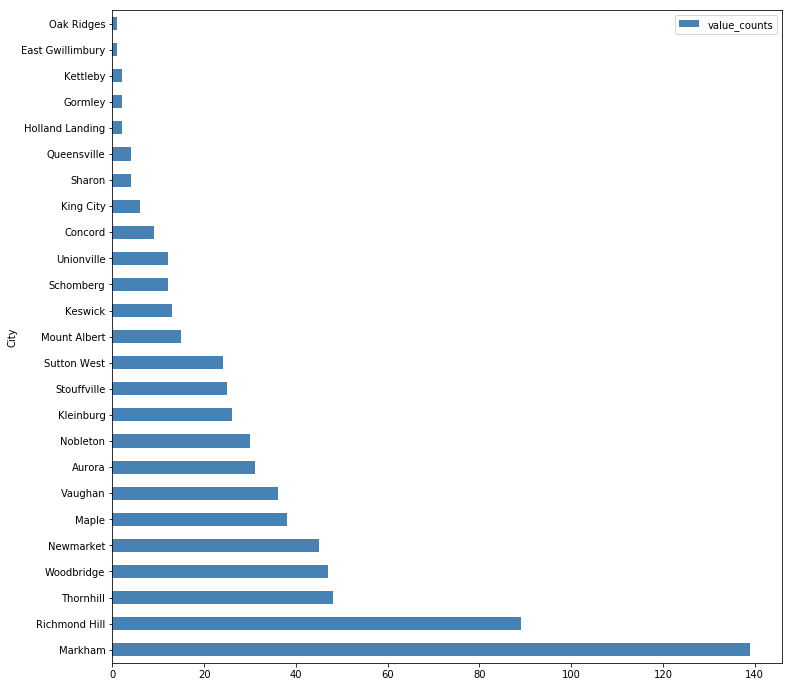

In [126]:
# create a bar plot to show the distribution of child care units per city
york_bar.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Child Care Centers')
plt.title('Child Care Center distribution per city')
for index, value in enumerate(york_bar): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()

In [55]:
#load data that was previously scraped from York regions generic website. Data set includes Programs available in York region for Child Care, Capacity and Vacancy numbers. 
url='https://gist.github.com/6d6cc1b7e2e5504cce039f986fc6a501'
response = requests.get(url)

#Process and convert html data
data = response.text
soup = BeautifulSoup(data,'html.parser')
table_wikipedia1=soup.find('table')

#Create the pandas dataframe
program_df = pd.read_html(str(table_wikipedia1))[0]
program_df.head()


Unnamed: 0  GCX_OID                    Program Available  Capacity  \
0         NaN        0                     Infant        No         0   
1         NaN        0                   Toddlers        No         0   
2         NaN        0                  Preschool        No         0   
3         NaN        0               Kindergarten        No         0   
4         NaN        0  Primary/Junior School Age       Yes        54   

   Vacancies  Waitlist  
0          0         0  
1          0         0  
2          0         0  
3          0         0  
4         22         0

We'll work with the data a bit to just keep what we need.

In [56]:
#drop index
program_df.drop(program_df.columns[0], axis=1, inplace=True)
program_df.head()

GCX_OID                    Program Available  Capacity  Vacancies  Waitlist
0        0                     Infant        No         0          0         0
1        0                   Toddlers        No         0          0         0
2        0                  Preschool        No         0          0         0
3        0               Kindergarten        No         0          0         0
4        0  Primary/Junior School Age       Yes        54         22         0

In [57]:
#set the dataset index as teh GCX_OID
program_df.set_index('GCX_OID', inplace=True)
program_df.head()

Program Available  Capacity  Vacancies  Waitlist
GCX_OID                                                                    
0                           Infant        No         0          0         0
0                         Toddlers        No         0          0         0
0                        Preschool        No         0          0         0
0                     Kindergarten        No         0          0         0
0        Primary/Junior School Age       Yes        54         22         0

In [58]:
#filter data set to only show which centers offer a specific Program.
df1 = program_df[(program_df['Available'] == 'Yes')]
df1.head()

Program Available  Capacity  Vacancies  Waitlist
GCX_OID                                                                    
0        Primary/Junior School Age       Yes        54         22         0
1        Primary/Junior School Age       Yes       150         15         0
2                         Toddlers       Yes        20          4         8
2                        Preschool       Yes        32         20        15
3                     Kindergarten       Yes        80         22         0

In [59]:
df1['Program'].value_counts()

Kindergarten                 355
Preschool                    347
Primary/Junior School Age    341
Toddlers                     294
Infant                       134
Junior School Age             33
Name: Program, dtype: int64

In [60]:
#filter dataset to only show Centers with Infant and Toddler programs
df2 = df1[(df1.Program.isin(["Infant","Toddlers"]))]
df2.head(10)

Program Available  Capacity  Vacancies  Waitlist
GCX_OID                                                   
2        Toddlers       Yes        20          4         8
6        Toddlers       Yes        30          0         0
8        Toddlers       Yes        15          5         9
10         Infant       Yes        10          0         0
10       Toddlers       Yes        30          0         0
16         Infant       Yes        10          9         0
16       Toddlers       Yes        15          5         0
17       Toddlers       Yes        12          0         0
20       Toddlers       Yes        15          0         0
23       Toddlers       Yes        24          0         0

In [61]:
#drop the Available column as it is not necessery anymore
df2.drop(['Available'], axis=1, inplace=True)
df2.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Program  Capacity  Vacancies  Waitlist
GCX_OID                                         
2        Toddlers        20          4         8
6        Toddlers        30          0         0
8        Toddlers        15          5         9
10         Infant        10          0         0
10       Toddlers        30          0         0

In [62]:
#filter to show only Infant Programs
dfIP = df2[(df2.Program.isin(["Infant"]))]
dfIP.head()

Program  Capacity  Vacancies  Waitlist
GCX_OID                                       
10       Infant        10          0         0
16       Infant        10          9         0
27       Infant        10          3         7
36       Infant        20         17         0
41       Infant        10          9         0

In [63]:
dfIP.describe()

Capacity   Vacancies    Waitlist
count  134.000000  134.000000  134.000000
mean     9.507463    5.597015    0.880597
std      4.439648    4.226873    3.459855
min      0.000000    0.000000    0.000000
25%      9.000000    3.000000    0.000000
50%     10.000000    6.000000    0.000000
75%     10.000000    8.000000    0.000000
max     20.000000   20.000000   30.000000

In [64]:
df2.head()

Program  Capacity  Vacancies  Waitlist
GCX_OID                                         
2        Toddlers        20          4         8
6        Toddlers        30          0         0
8        Toddlers        15          5         9
10         Infant        10          0         0
10       Toddlers        30          0         0

In [65]:
df2.describe(include=['object'])

Program
count        428
unique         2
top     Toddlers
freq         294

In [66]:
dfTP = df2[(df2.Program.isin(["Toddlers"]))]
dfTP.head()

Program  Capacity  Vacancies  Waitlist
GCX_OID                                         
2        Toddlers        20          4         8
6        Toddlers        30          0         0
8        Toddlers        15          5         9
10       Toddlers        30          0         0
16       Toddlers        15          5         0

In [67]:
dfIP.describe(include=['object'])

Program
count      134
unique       1
top     Infant
freq       134

In [68]:
dfTP.describe(include=['object'])

Program
count        294
unique         1
top     Toddlers
freq         294

In [69]:
#Save dataset
df2.to_csv('Programs.csv', index=False)
print('Saved!')

Saved!


In [70]:
#Scrape data for Market rates for the York region child care centers
url='https://gist.github.com/1ae25c153e580e1a1f7030e7d52629f4'
response = requests.get(url)

#Process and convert html data
data = response.text
soup = BeautifulSoup(data,'html.parser')
table_wikipedia2=soup.find('table')

#Create the pandas dataframe
marketrates_df = pd.read_html(str(table_wikipedia2))[0]
marketrates_df.head()


Unnamed: 0  GCX_OID            CareDescription    AgeGroup MarketRate
0         NaN        0    School Age After School  School Age     $14.21
1         NaN        0  School Age Before & After  School Age     $15.26
2         NaN        0   School Age Before School  School Age      $7.13
3         NaN        0        School Age Full Day  School Age     $46.00
4         NaN        1  Kindergarten After School   Preschool     $21.00

In [71]:
marketrates_df.drop(marketrates_df.columns[0], axis=1, inplace=True)
marketrates_df.set_index('GCX_OID', inplace=True)
marketrates_df.head()

CareDescription    AgeGroup MarketRate
GCX_OID                                                  
0          School Age After School  School Age     $14.21
0        School Age Before & After  School Age     $15.26
0         School Age Before School  School Age      $7.13
0              School Age Full Day  School Age     $46.00
1        Kindergarten After School   Preschool     $21.00

In [144]:
marketrates_df['CareDescription'].value_counts()

Kindergarten Full Day                     390
School Age Full Day                       340
School Age Before & After                 333
Kindergarten Before & After               325
School Age After School                   322
Kindergarten After School                 321
School Age Before School                  320
Kindergarten Before School                310
Preschool Full Day                        299
Toddler Full Day                          275
Infant Full Day                           132
Preschool Half Day                         83
Toddler Half Day                           63
Kindergarten Half Day                      37
Nursery School                             27
Infant Half Day                            19
Emergency Toddler Full Day                 11
Emergency Preschool Full Day               11
Emergency School Age Full Day              11
Emergency Infant Full Day                  11
H Infant Full Day                           9
H Toddler Full Day                

In [72]:
df3 = marketrates_df[(marketrates_df.CareDescription.isin(["Toddler Full Day","Infant Full Day","Toddler Half Day","Nursery School","Infant Half Day","Emergency Toddler Full Day","Emergency Infant Full Day","H Infant Full Day","H Toddler Full Day","Emergency Infant Extended Day","Emergency Toddler Extended Day","H Toddler Part Day","H Toddler Half Day","H Infant Half Day","H Infant Part Day"]))]

In [73]:
df3.head(10)

CareDescription   AgeGroup MarketRate
GCX_OID                                        
2        Toddler Full Day    Toddler     $52.00
2          Nursery School  Preschool     $20.80
4        Toddler Full Day    Toddler     $58.48
8        Toddler Full Day    Toddler     $54.48
10        Infant Full Day     Infant     $75.50
10       Toddler Full Day    Toddler     $60.75
16        Infant Full Day     Infant     $62.07
16       Toddler Full Day    Toddler     $52.87
17       Toddler Full Day    Toddler     $61.36
17       Toddler Half Day    Toddler     $39.27

In [74]:
df3.dtypes

CareDescription    object
AgeGroup           object
MarketRate         object
dtype: object

In [75]:
df3['MarketRate'] = df3['MarketRate'].str.replace('$', '')
df3['MarketRate'] = df3['MarketRate'].astype(int)
df3.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


ValueError: invalid literal for int() with base 10: '52.00'

In [76]:
df3.head()

CareDescription   AgeGroup MarketRate
GCX_OID                                        
2        Toddler Full Day    Toddler      52.00
2          Nursery School  Preschool      20.80
4        Toddler Full Day    Toddler      58.48
8        Toddler Full Day    Toddler      54.48
10        Infant Full Day     Infant      75.50

In [77]:
#show rates for Infant programs only
df3INF = df3[(df3.AgeGroup.isin(["Infant"]))]
df3INF.head()

CareDescription AgeGroup MarketRate
GCX_OID                                               
10                 Infant Full Day   Infant      75.50
16                 Infant Full Day   Infant      62.07
27                 Infant Full Day   Infant      77.60
27       Emergency Infant Full Day   Infant      67.87
36                 Infant Full Day   Infant      68.97

In [59]:
#check top 10 highest prices for Infant programs
df3INF.groupby('MarketRate').head(10)

NameError: name 'df3INF' is not defined

In [ ]:
#Check top 10 lowest prices for Infant program
df3INF.groupby('MarketRate').tail(10)

In [ ]:
#Check how many full day vs half day there are for Infants
df3INF['CareDescription'].value_counts()

In [78]:
#Show rates for toddler programs only
df3TDL = df3[(df3.AgeGroup.isin(["Toddler"]))]
df3TDL.head()

CareDescription AgeGroup MarketRate
GCX_OID                                      
2        Toddler Full Day  Toddler      52.00
4        Toddler Full Day  Toddler      58.48
8        Toddler Full Day  Toddler      54.48
10       Toddler Full Day  Toddler      60.75
16       Toddler Full Day  Toddler      52.87

In [ ]:
#check top 10 highest prices for Toddler programs
df3TDL.groupby('MarketRate').head(10)

In [ ]:
#Check top 10 lowest prices for Toddler program
df3TDL.groupby('MarketRate').tail(10)

In [ ]:
#Check how many full day vs half day there are for Toddlers
df3TDL['CareDescription'].value_counts()

In [79]:
df3INF[["MarketRate"]] = df3INF[["MarketRate"]].astype("float")

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [80]:
#Define bin min and max in order to be able to plot them later on and understand a distribution of prices
bins = np.linspace(min(df3INF["MarketRate"]), max(df3INF["MarketRate"]), 4)
bins

array([ 22.5       ,  50.78666667,  79.07333333, 107.36      ])

In [81]:
#define bin Categories
group_namesINF = ['Low', 'Medium', 'High']

In [82]:
#group market rates into bins
df3INF['MarketRate1-binned'] = pd.cut(df3INF['MarketRate'], bins, labels=group_namesINF, include_lowest=True )
df3INF[['MarketRate','MarketRate1-binned']].head(20)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


MarketRate MarketRate1-binned
GCX_OID                               
10            75.50             Medium
16            62.07             Medium
27            77.60             Medium
27            67.87             Medium
36            68.97             Medium
36            45.75                Low
41            78.00             Medium
47            72.50             Medium
47            56.25             Medium
50            68.74             Medium
50            50.00                Low
57            73.56             Medium
58            65.00             Medium
59            72.64             Medium
62            70.00             Medium
63            82.50               High
63           107.36               High
63            67.87             Medium
64            85.90               High
68            80.46               High

In [83]:
df3INF["MarketRate1-binned"].value_counts()

Medium    138
Low        28
High       27
Name: MarketRate1-binned, dtype: int64

Text(0.5, 1.0, 'Market Rate Infants')

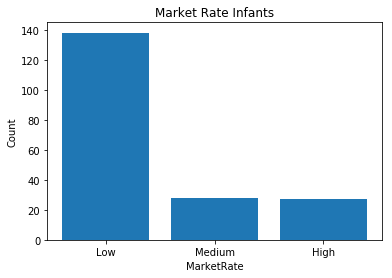

In [84]:
#plot the market rates for Infant data
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_namesINF, df3INF["MarketRate1-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("MarketRate")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Market Rate Infants")

In [85]:
#Define bins for Toddler market rates 
df3TDL[["MarketRate"]] = df3TDL[["MarketRate"]].astype("float")

In [86]:
bins = np.linspace(min(df3TDL["MarketRate"]), max(df3TDL["MarketRate"]), 4)
bins

array([22.5       , 45.23666667, 67.97333333, 90.71      ])

In [87]:
group_namesTDL = ['Low', 'Medium', 'High']

In [88]:
df3TDL['MarketRate2-binned'] = pd.cut(df3TDL['MarketRate'], bins, labels=group_namesTDL, include_lowest=True )
df3TDL[['MarketRate','MarketRate2-binned']].head(20)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


MarketRate MarketRate2-binned
GCX_OID                               
2             52.00             Medium
4             58.48             Medium
8             54.48             Medium
10            60.75             Medium
16            52.87             Medium
17            61.36             Medium
17            39.27                Low
27            59.60             Medium
27            53.58             Medium
28            44.83                Low
30            52.00             Medium
32            60.41             Medium
34            51.50             Medium
36            53.10             Medium
36            36.78                Low
37            58.62             Medium
39            60.41             Medium
41            71.00               High
44            58.39             Medium
44            47.00             Medium

In [89]:
df3TDL["MarketRate2-binned"].value_counts()

Medium    289
Low        64
High       27
Name: MarketRate2-binned, dtype: int64

Text(0.5, 1.0, 'Market Rate Toddlers')

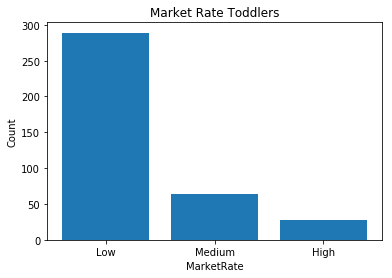

In [90]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_namesTDL, df3TDL["MarketRate2-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("MarketRate")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Market Rate Toddlers")

In [91]:
#Save dataset
marketrates_df.to_csv('MarketRates.csv', index=False)
print('Saved!')

Saved!


### Foursquare API for data on child care locations and neighbourhood soroundings

### Define Foursquare Credentials and Version

In [92]:
CLIENT_ID = 'S2L13KRSC4OFXLSPBT2IKLOWSP245UGQUILLAALYDCW1M2TP' # your Foursquare ID
CLIENT_SECRET = 'T2HKG0WWBEKYU1O5EV223MM3MRAGRV1XJ2G2V1MKCO0WHAJJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S2L13KRSC4OFXLSPBT2IKLOWSP245UGQUILLAALYDCW1M2TP
CLIENT_SECRET:T2HKG0WWBEKYU1O5EV223MM3MRAGRV1XJ2G2V1MKCO0WHAJJ


We can use the Foursquare API to get the child care center options of each neighborhood. But first, let's get the latitude longitude of Markham.

In [229]:
address = 'Markham, Ontario'

geolocator = Nominatim(user_agent="york_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Markham Region are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Markham Region are 43.8563707, -79.3376825.


In [226]:
gtaraw_df['Borough'].value_counts()

Markham             7
Richmond Hill       4
East Gwillimbury    4
Thornhill           2
Newmarket           2
Aurora              1
Name: Borough, dtype: int64

In [227]:
markham_df = gtaraw_df[(gtaraw_df.Borough.isin(["Markham"]))]
markham_df.head()

PostalCode  Borough                            Neighborhood  Latitude  \
1         L6B  Markham  Cornell, Ontario / Box Grove, Ontario)   43.8687   
2         L6C  Markham   Berczy Village / Cachet / Angus Glen)   43.8783   
4         L6E  Markham                         Wismer Commons)   43.8992   
7         L6G  Markham      Downtown Markham / Markham Centre)   43.8458   
13        L3P  Markham                                Central)   43.8793   

    Longitude  
1    -79.2254  
2    -79.3522  
4    -79.2733  
7    -79.3325  
13   -79.2620

In [228]:
#Map of Markham
map_Markham = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(gtaraw_df['Latitude'], gtaraw_df['Longitude'], gtaraw_df['Borough']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Markham)  
    
map_Markham

In [230]:
address = 'Markham, Ontario'

geolocator = Nominatim(user_agent="york_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Markham Region are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Markham Region are 43.8563707, -79.3376825.


In [237]:
radius = 70000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
   longitude, 
    radius, 
   LIMIT)
results = requests.get(url).json()
print(results)

{'meta': {'code': 200, 'requestId': '5fb565fcd64a734725d21401'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Markham', 'headerFullLocation': 'Markham', 'headerLocationGranularity': 'city', 'totalResults': 238, 'suggestedBounds': {'ne': {'lat': 44.48637133000063, 'lng': -78.46562212313358}, 'sw': {'lat': 43.22637006999937, 'lng': -80.20974287686641}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b4a61e2f964a520fc8526e3', 'name': 'Old Firehall Confectionary', 'location': {'address': '170 Main St.', 'crossStreet': 'at Victoria Ave', 'lat': 43.86712629313228, 'lng': -79.31208364051655, 'labeledLatLngs': [{'label': 'display', 'lat': 43.86712629313228, 'lng': -79.31208364051655}], 'distance': 2378, 'postalCode': 'L3R 2G9', 'c

In [238]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.id', 'venue.location.address', 'venue.location.cc',
       'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [239]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [241]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

venue.name  \
0  Old Firehall Confectionary   
1                Toogood Pond   
2                Maryam Hotel   
3              Mill Pond Park   
4                 Mona's Roti   

                                    venue.categories  venue.location.lat  \
0  [{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...           43.867126   
1  [{'id': '4bf58dd8d48988d163941735', 'name': 'P...           43.870701   
2  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...           43.766961   
3  [{'id': '4bf58dd8d48988d163941735', 'name': 'P...           43.876041   
4  [{'id': '4bf58dd8d48988d144941735', 'name': 'C...           43.791613   

   venue.location.lng  
0          -79.312084  
1          -79.313803  
2          -79.401199  
3          -79.452215  
4          -79.251015

In [242]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

name            categories        lat        lng
0  Old Firehall Confectionary          Dessert Shop  43.867126 -79.312084
1                Toogood Pond                  Park  43.870701 -79.313803
2                Maryam Hotel                 Hotel  43.766961 -79.401199
3              Mill Pond Park                  Park  43.876041 -79.452215
4                 Mona's Roti  Caribbean Restaurant  43.791613 -79.251015

In [243]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Park                    7
Caribbean Restaurant    2
Bakery                  2
Dessert Shop            2
Fish & Chips Shop       1
Japanese Restaurant     1
Flower Shop             1
Other Great Outdoors    1
Athletics & Sports      1
Korean Restaurant       1
Name: categories, dtype: int64

In [253]:
#define a function that runs through all neighbourhoods
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [254]:
#nearby venues
Markham_venues = getNearbyVenues(names=gtaraw_df['Borough'],
                                   latitudes=gtaraw_df['Latitude'],
                                   longitudes=gtaraw_df['Longitude']
                                  )

Richmond Hill
Markham
Markham
Richmond Hill
Markham
Richmond Hill
Aurora
Markham
Thornhill
East Gwillimbury
East Gwillimbury
East Gwillimbury
East Gwillimbury
Markham
Markham
Markham
Richmond Hill
Thornhill
Newmarket
Newmarket


In [255]:
# one hot encoding
Markham_onehot = pd.get_dummies(Markham_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Markham_onehot['Borough'] = Markham_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [Markham_onehot.columns[-1]] + list(Markham_onehot.columns[:-1])
Markham_onehot = Markham_onehot[fixed_columns]
Markham_grouped = Markham_onehot.groupby('Borough').mean().reset_index()
Markham_onehot.head(5)

Borough  Bakery  Bank  Bar  Cantonese Restaurant  Dessert Shop  \
0  Richmond Hill       0     0    0                     0             0   
1  Richmond Hill       0     0    0                     0             0   
2  Richmond Hill       0     0    0                     0             0   
3  Richmond Hill       0     0    0                     0             0   
4  Richmond Hill       1     0    0                     0             0   

   Diner  Fast Food Restaurant  Food  Grocery Store  Gym / Fitness Center  \
0      0                     0     0              0                     0   
1      0                     0     0              0                     0   
2      0                     0     0              0                     0   
3      0                     0     0              0                     0   
4      0                     0     0              0                     0   

   Hobby Shop  Hotel  Japanese Restaurant  Juice Bar  Night Market  \
0           0      0                    0          0             0   
1           1      0                    0          0             0   
2           0      1                    0          0             0   
3           0      0                    0          0             0   
4           0      0                    0          0             0   

   Noodle House  Park  Pharmacy  Pizza Place  Pub  Restaurant  Shopping Mall  \
0             0     0         0            0    0           0              0   
1             0     0         0            0    0           0              0   
2             0     0         0            0    0           0              0   
3             0     0         0            0    0           0              0   
4             0     0         0            0    0           0              0   

   Spa  Sushi Restaurant  Theater  Toy / Game Store  Yoga Studio  
0    1                 0        0                 0            0  
1    0                 0        0                 0            0  
2    0                 0        0                 0            0  
3    0                 0        1                 0            0  
4    0                 0        0                 0            0

In [256]:
num_top_venues = 5
for hood in Markham_grouped['Borough']:
    print("---- "+hood+" ----")
    temp =Markham_grouped[Markham_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Aurora ----
              venue  freq
0            Bakery  0.04
1      Night Market  0.04
2  Toy / Game Store  0.04
3           Theater  0.04
4  Sushi Restaurant  0.04


---- East Gwillimbury ----
              venue  freq
0            Bakery  0.04
1      Night Market  0.04
2  Toy / Game Store  0.04
3           Theater  0.04
4  Sushi Restaurant  0.04


---- Markham ----
              venue  freq
0            Bakery  0.04
1      Night Market  0.04
2  Toy / Game Store  0.04
3           Theater  0.04
4  Sushi Restaurant  0.04


---- Newmarket ----
              venue  freq
0            Bakery  0.04
1      Night Market  0.04
2  Toy / Game Store  0.04
3           Theater  0.04
4  Sushi Restaurant  0.04


---- Richmond Hill ----
              venue  freq
0            Bakery  0.04
1      Night Market  0.04
2  Toy / Game Store  0.04
3           Theater  0.04
4  Sushi Restaurant  0.04


---- Thornhill ----
              venue  freq
0            Bakery  0.04
1      Night Market  0.04
2  Toy

In [257]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [2]:
#Get data for Child care centers
url='https://gist.github.com/e4f372bf7cedd8f83a08230fdeb81fbd'
response = requests.get(url)

#Process and convert html data
data = response.text
soup = BeautifulSoup(data,'html.parser')
table_wikipedia2=soup.find('table')

#Create the pandas dataframe
ccc_df = pd.read_html(str(table_wikipedia2))[0]
ccc_df.head()

Unnamed: 0  GCX_OID                                               Name  \
0         NaN        0                    Kids Connection @ Beverly Acres   
1         NaN        1  Windham Ridge YMCA Before & After School Age P...   
2         NaN        2                  Vaughan City Hall YMCA Child Care   
3         NaN        3                             John McCrae Child Care   
4         NaN        4                 Armitage Village Child Care Centre   

                                        Organization    ServiceCategory  \
0                   Kids Connection Care & Education  Child Care Centre   
1                            YMCA of Greater Toronto  Child Care Centre   
2                            YMCA of Greater Toronto  Child Care Centre   
3  Upper Canada Creative Child Care Centres of On...  Child Care Centre   
4  Upper Canada Creative Child Care Centres of On...  Child Care Centre   

                      Type                     Address Unit      Community  \
0  Centre Based Child Care              283 Neal Drive  NaN  Richmond Hill   
1  Centre Based Child Care       32 Red Cardinal Trail  NaN  Richmond Hill   
2  Centre Based Child Care  2141 Major Mackenzie Drive  NaN          Maple   
3  Centre Based Child Care  565 Fred McLaren Boulevard  NaN        Markham   
4  Centre Based Child Care             125 Savage Road  NaN      Newmarket   

    Municipality                           MainIntersection PostalCode  \
0  Richmond Hill     Bayview Avenue & Major MacKenzie Drive    L4C 3L3   
1  Richmond Hill            Yonge Street & Bloomington Road    L4E 3Y4   
2        Vaughan  Major Mackenzie Drive West & Keele Street    L6A 1T1   
3        Markham             Major Mackenzie & McCowan Road    L6E 1N7   
4      Newmarket                Yonge Street & Mulock Drive    L3X 1R1   

         ContactName     PhoneNumber PhoneExtension  \
0   Melissa Tawadros  (905) 879-6006            NaN   
1    Monica Tersigni  (416) 561-5900            NaN   
2  Maria Diamantakos  (905) 832-5204            NaN   
3   Stephanie Murray  (905) 202-4310            NaN   
4        Corey Weber  (905) 830-9719            NaN   

                               Website       FaxNumber SchoolBased  \
0      http://www.kidsconnectionce.com  (905) 771-0442         Yes   
1               http://www.ymcagta.org             NaN         Yes   
2               http://www.ymcagta.org  (905) 943-7612          No   
3  http://www.uppercanadachildcare.com  (905) 201-0571         Yes   
4  http://www.uppercanadachildcare.com  (905) 830-1980         Yes   

              SchoolName                            AgeGroups FeeSubsidized  \
0    Beverley Acres P.S.                           School Age           Yes   
1     Windham Ridge P.S.                           School Age           Yes   
2                    NaN                   Toddler, Preschool           Yes   
3       John McCrae P.S.             Kindergarten, School Age           Yes   
4  Armitage Village P.S.  Preschool, Kindergarten, School Age           Yes   

                                      ProgramDetails  
0  Before and After School program - also PA Days...  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  Directors approval for 3 children 2 to 2.5 in ...

In [3]:
ccc_df.drop(ccc_df.columns[0], axis=1, inplace=True)
ccc_df.set_index('GCX_OID', inplace=True)
ccc_df.head()

Name  \
GCX_OID                                                      
0                          Kids Connection @ Beverly Acres   
1        Windham Ridge YMCA Before & After School Age P...   
2                        Vaughan City Hall YMCA Child Care   
3                                   John McCrae Child Care   
4                       Armitage Village Child Care Centre   

                                              Organization    ServiceCategory  \
GCX_OID                                                                         
0                         Kids Connection Care & Education  Child Care Centre   
1                                  YMCA of Greater Toronto  Child Care Centre   
2                                  YMCA of Greater Toronto  Child Care Centre   
3        Upper Canada Creative Child Care Centres of On...  Child Care Centre   
4        Upper Canada Creative Child Care Centres of On...  Child Care Centre   

                            Type                     Address Unit  \
GCX_OID                                                             
0        Centre Based Child Care              283 Neal Drive  NaN   
1        Centre Based Child Care       32 Red Cardinal Trail  NaN   
2        Centre Based Child Care  2141 Major Mackenzie Drive  NaN   
3        Centre Based Child Care  565 Fred McLaren Boulevard  NaN   
4        Centre Based Child Care             125 Savage Road  NaN   

             Community   Municipality  \
GCX_OID                                 
0        Richmond Hill  Richmond Hill   
1        Richmond Hill  Richmond Hill   
2                Maple        Vaughan   
3              Markham        Markham   
4            Newmarket      Newmarket   

                                  MainIntersection PostalCode  \
GCX_OID                                                         
0           Bayview Avenue & Major MacKenzie Drive    L4C 3L3   
1                  Yonge Street & Bloomington Road    L4E 3Y4   
2        Major Mackenzie Drive West & Keele Street    L6A 1T1   
3                   Major Mackenzie & McCowan Road    L6E 1N7   
4                      Yonge Street & Mulock Drive    L3X 1R1   

               ContactName     PhoneNumber PhoneExtension  \
GCX_OID                                                     
0         Melissa Tawadros  (905) 879-6006            NaN   
1          Monica Tersigni  (416) 561-5900            NaN   
2        Maria Diamantakos  (905) 832-5204            NaN   
3         Stephanie Murray  (905) 202-4310            NaN   
4              Corey Weber  (905) 830-9719            NaN   

                                     Website       FaxNumber SchoolBased  \
GCX_OID                                                                    
0            http://www.kidsconnectionce.com  (905) 771-0442         Yes   
1                     http://www.ymcagta.org             NaN         Yes   
2                     http://www.ymcagta.org  (905) 943-7612          No   
3        http://www.uppercanadachildcare.com  (905) 201-0571         Yes   
4        http://www.uppercanadachildcare.com  (905) 830-1980         Yes   

                    SchoolName                            AgeGroups  \
GCX_OID                                                               
0          Beverley Acres P.S.                           School Age   
1           Windham Ridge P.S.                           School Age   
2                          NaN                   Toddler, Preschool   
3             John McCrae P.S.             Kindergarten, School Age   
4        Armitage Village P.S.  Preschool, Kindergarten, School Age   

        FeeSubsidized                                     ProgramDetails  
GCX_OID                                                                   
0                 Yes  Before and After School program - also PA Days...  
1                 Yes                                                NaN  
2                 Yes                                           

In [4]:
postal_c = ccc_df['PostalCode']
postal_c.head()

GCX_OID
0    L4C 3L3
1    L4E 3Y4
2    L6A 1T1
3    L6E 1N7
4    L3X 1R1
Name: PostalCode, dtype: object

In [6]:
!pip install geocoder
import geocoder

     |████████████████████████████████| 102kB 12.0MB/s ta 0:00:01


In [9]:
def get_latilong(postal_c):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Markham, Ontario'.format(postal_c))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('L4A',)

[43.85651000000007, -79.33981999999997]

In [11]:
coords = [ get_latilong(postal_c) for postal_c in postal_c.tolist() ]
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [12]:
ccc_df['Latitude'] = df_coords['Latitude']
ccc_df['Longitude'] = df_coords['Longitude']

In [15]:
ccc_df.head(20)

Name  \
GCX_OID                                                      
0                          Kids Connection @ Beverly Acres   
1        Windham Ridge YMCA Before & After School Age P...   
2                        Vaughan City Hall YMCA Child Care   
3                                   John McCrae Child Care   
4                       Armitage Village Child Care Centre   
5                    Newmarket Co-Operative Nursery School   
6                                   Toronto Waldorf School   
7           Our Lady of Hope Before & After School Program   
8                            Harry Bowes Children's Centre   
9                                             Best Friends   
10                              Cedar Glen YMCA Child Care   
11                           Fun On The Run - Holy Jubilee   
12                                    Terry Fox School Age   
13               Poplar Bank Before & After School Program   
14            St. Michael the Archangel School Age Program   
15                             Ross Doan Child Care Centre   
16                              Country Kids Nobleton Inc.   
17                                  Great Lakes Montessori   
18                                                    Pals   
19       Le Club Child Care - School Age Child Care - W...   

                                              Organization    ServiceCategory  \
GCX_OID                                                                         
0                         Kids Connection Care & Education  Child Care Centre   
1                                  YMCA of Greater Toronto  Child Care Centre   
2                                  YMCA of Greater Toronto  Child Care Centre   
3        Upper Canada Creative Child Care Centres of On...  Child Care Centre   
4        Upper Canada Creative Child Care Centres of On...  Child Care Centre   
5              Newmarket Co-Operative Nursery School, Inc.  Child Care Centre   
6                               The Toronto Waldorf School  Child Care Centre   
7           Our Lady of the Annunciation Child Care Centre  Child Care Centre   
8        Upper Canada Creative Child Care Centres of On...  Child Care Centre   
9                                       605061 Ontario Ltd  Child Care Centre   
10                                 YMCA of Greater Toronto  Child Care Centre   
11                        Fun on the Run Pre-School Centre  Child Care Centre   
12                                      Denison Child Care  Child Care Centre   
13                                      Denison Child Care  Child Care Centre   
14                  Community of Maple Child Care Services  Child Care Centre   
15                                Family Day Care Services  Child Care Centre   
16                              Country Kids Nobleton Inc.  Child Care Centre   
17                                    2494290 Ontario Inc.  Child Care Centre   
18                                      605061 Ontario Ltd  Child Care Centre   
19                              Le Club Child Care Program  Child Care Centre   

                              Type                      Address Unit  \
GCX_OID                                                                
0          Centre Based Child Care               283 Neal Drive  NaN   
1          Centre Based Child Care        32 Red Cardinal Trail  NaN   
2          Centre Based Child Care   2141 Major Mackenzie Drive  NaN   
3          Centre Based Child Care   565 Fred McLaren Boulevard  NaN   
4          Centre Based Child Care              125 Savage Road  NaN   
5        Nursery School Child Care              443 Park Avenue  NaN   
6          Centre Based Child Care         9100 Bathurst Street  NaN   
7          Centre Based Child Care        80 Red Cardinal Trail  NaN   
8          Centre Based Child Care            90 Greenwood Road  NaN   
9          Centre Based Child Care              70 Devins Drive  NaN   
10         Centre Based Child Care        

In [16]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [17]:
#check if the Community column holds the names of the neighbourhoods
ccc_df['Community'].value_counts()

Markham             119
Richmond Hill        89
Thornhill            50
Woodbridge           45
Newmarket            43
Vaughan              41
Aurora               34
Maple                30
Stouffville          24
Keswick              11
Unionville           10
Concord               7
King City             6
Sutton West           5
Nobleton              5
Kleinburg             5
East Gwillimbury      4
Mount Albert          4
Schomberg             4
Holland Landing       3
Newmaket              2
Queensville           2
Sharon                2
Kettleby              1
Oak Ridges            1
Gormley               1
Name: Community, dtype: int64

In [22]:
ccc_df.rename({'Community':'Neighboourhoods'}, axis=1, inplace =True)
ccc_df.head()

Name  \
GCX_OID                                                      
0                          Kids Connection @ Beverly Acres   
1        Windham Ridge YMCA Before & After School Age P...   
2                        Vaughan City Hall YMCA Child Care   
3                                   John McCrae Child Care   
4                       Armitage Village Child Care Centre   

                                              Organization    ServiceCategory  \
GCX_OID                                                                         
0                         Kids Connection Care & Education  Child Care Centre   
1                                  YMCA of Greater Toronto  Child Care Centre   
2                                  YMCA of Greater Toronto  Child Care Centre   
3        Upper Canada Creative Child Care Centres of On...  Child Care Centre   
4        Upper Canada Creative Child Care Centres of On...  Child Care Centre   

                            Type                     Address Unit  \
GCX_OID                                                             
0        Centre Based Child Care              283 Neal Drive  NaN   
1        Centre Based Child Care       32 Red Cardinal Trail  NaN   
2        Centre Based Child Care  2141 Major Mackenzie Drive  NaN   
3        Centre Based Child Care  565 Fred McLaren Boulevard  NaN   
4        Centre Based Child Care             125 Savage Road  NaN   

        Neighboourhoods   Municipality  \
GCX_OID                                  
0         Richmond Hill  Richmond Hill   
1         Richmond Hill  Richmond Hill   
2                 Maple        Vaughan   
3               Markham        Markham   
4             Newmarket      Newmarket   

                                  MainIntersection PostalCode  \
GCX_OID                                                         
0           Bayview Avenue & Major MacKenzie Drive    L4C 3L3   
1                  Yonge Street & Bloomington Road    L4E 3Y4   
2        Major Mackenzie Drive West & Keele Street    L6A 1T1   
3                   Major Mackenzie & McCowan Road    L6E 1N7   
4                      Yonge Street & Mulock Drive    L3X 1R1   

               ContactName     PhoneNumber PhoneExtension  \
GCX_OID                                                     
0         Melissa Tawadros  (905) 879-6006            NaN   
1          Monica Tersigni  (416) 561-5900            NaN   
2        Maria Diamantakos  (905) 832-5204            NaN   
3         Stephanie Murray  (905) 202-4310            NaN   
4              Corey Weber  (905) 830-9719            NaN   

                                     Website       FaxNumber SchoolBased  \
GCX_OID                                                                    
0            http://www.kidsconnectionce.com  (905) 771-0442         Yes   
1                     http://www.ymcagta.org             NaN         Yes   
2                     http://www.ymcagta.org  (905) 943-7612          No   
3        http://www.uppercanadachildcare.com  (905) 201-0571         Yes   
4        http://www.uppercanadachildcare.com  (905) 830-1980         Yes   

                    SchoolName                            AgeGroups  \
GCX_OID                                                               
0          Beverley Acres P.S.                           School Age   
1           Windham Ridge P.S.                           School Age   
2                          NaN                   Toddler, Preschool   
3             John McCrae P.S.             Kindergarten, School Age   
4        Armitage Village P.S.  Preschool, Kindergarten, School Age   

        FeeSubsidized                                     ProgramDetails  \
GCX_OID                                                                    
0                 Yes  Before and After School program - also PA Days...   
1                 Yes                                                NaN   
2                 Yes                                

In [18]:
# check how many child care centers are there per neighbourhood
ccc_df['Municipality'].value_counts()

Vaughan                   162
Markham                   146
Richmond Hill              89
Newmarket                  45
Aurora                     34
Whitchurch-Stouffville     25
King                       17
Georgina                   16
East Gwillimbury           14
Name: Municipality, dtype: int64

In [20]:
# Check how many child care centers are present in school environments
ccc_df['SchoolBased'].value_counts()

No     301
Yes    247
Name: SchoolBased, dtype: int64

In [23]:
address = 'Markham, Ontario'

geolocator = Nominatim(user_agent="mkh_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Markham are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Markham are 43.8563707, -79.3376825.


In [25]:
# create map of Markham using latitude and longitude values
map_markham = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ccc_df['Latitude'], ccc_df['Longitude'], ccc_df['Municipality'], ccc_df['Neighboourhoods']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_markham)  
    
map_markham

### Explore Forsquare data

#### I'm again exploring Forsquare data of Markham's sorounding neighbourhoods but now with the purpose of udnerstanding what is best as a neighbourhood in terms of other facilities in relation to child care centers. 

In [29]:
CLIENT_ID = 'S2L13KRSC4OFXLSPBT2IKLOWSP245UGQUILLAALYDCW1M2TP' # your Foursquare ID
CLIENT_SECRET = 'T2HKG0WWBEKYU1O5EV223MM3MRAGRV1XJ2G2V1MKCO0WHAJJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 650
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S2L13KRSC4OFXLSPBT2IKLOWSP245UGQUILLAALYDCW1M2TP
CLIENT_SECRET:T2HKG0WWBEKYU1O5EV223MM3MRAGRV1XJ2G2V1MKCO0WHAJJ


In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighboourhoods', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
# run the above function for each neighbourhood and create a data farme
mkh_venues = getNearbyVenues(names=ccc_df['Neighboourhoods'],
                                   latitudes=ccc_df['Latitude'],
                                   longitudes=ccc_df['Longitude']
                                  )

Richmond Hill
Richmond Hill
Maple
Markham
Newmarket
Newmarket
Thornhill
Richmond Hill
Stouffville
Aurora
Schomberg
Vaughan
Newmarket
Newmarket
Vaughan
Richmond Hill
Nobleton
Thornhill
Markham
Thornhill
Markham
Nobleton
Markham
Markham
Newmarket
Newmarket
Thornhill
Vaughan
Unionville
Markham
Markham
Aurora
Richmond Hill
Stouffville
Holland Landing
Richmond Hill
Markham
Thornhill
Woodbridge
Markham
Aurora
Markham
Markham
Richmond Hill
Markham
Maple
Richmond Hill
Richmond Hill
Stouffville
Woodbridge
Richmond Hill
Richmond Hill
Stouffville
Newmarket
Woodbridge
Richmond Hill
Markham
Richmond Hill
Schomberg
Vaughan
Maple
Unionville
Maple
Newmaket
Vaughan
Unionville
Maple
Newmarket
Markham
Maple
Markham
Stouffville
Woodbridge
Vaughan
Concord
Markham
Unionville
Richmond Hill
Vaughan
Sharon
Thornhill
Queensville
Richmond Hill
Woodbridge
Richmond Hill
Aurora
Newmarket
Markham
Aurora
Woodbridge
Vaughan
Thornhill
Maple
Aurora
Richmond Hill
Kleinburg
Markham
Thornhill
Woodbridge
Markham
Aurora
Newm

In [34]:
#check the size of the resulting data frame
print(mkh_venues.shape)
mkh_venues.head()

(6039, 7)


Neighboourhoods  Neighborhood Latitude  Neighborhood Longitude  \
0   Richmond Hill               43.88766               -79.42364   
1   Richmond Hill               43.88766               -79.42364   
2   Richmond Hill               43.88766               -79.42364   
3   Richmond Hill               43.88766               -79.42364   
4   Richmond Hill               43.88766               -79.42364   

                            Venue  Venue Latitude  Venue Longitude  \
0  Chingu Korean Restaurant 친구 朋友       43.889859       -79.419887   
1               Big Boy's Burgers       43.890434       -79.419151   
2              YRT Bus Stop #2856       43.889642       -79.427545   
3            GoGo Chicken Pot 咪走雞       43.889944       -79.420027   
4            Little Caesars Pizza       43.889914       -79.419823   

         Venue Category  
0     Korean Restaurant  
1          Burger Joint  
2              Bus Stop  
3  Cantonese Restaurant  
4           Pizza Place

In [35]:
#check how many venues were returned per neighbourhood
mkh_venues.groupby('Neighboourhoods').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighboourhoods                                                          
Aurora                              476                     476    476   
Concord                              99                      99     99   
East Gwillimbury                     56                      56     56   
Gormley                               4                       4      4   
Holland Landing                      42                      42     42   
Keswick                             154                     154    154   
Kettleby                             14                      14     14   
King City                            84                      84     84   
Kleinburg                            70                      70     70   
Maple                               434                     434    434   
Markham                             907                     907    907   
Mount Albert                         56                      56     56   
Newmaket                             28                      28     28   
Newmarket                           602                     602    602   
Nobleton                             70                      70     70   
Oak Ridges                            4                       4      4   
Queensville                          28                      28     28   
Richmond Hill                       774                     774    774   
Schomberg                            56                      56     56   
Sharon                               28                      28     28   
Stouffville                         323                     323    323   
Sutton West                          70                      70     70   
Thornhill                           430                     430    430   
Unionville                           60                      60     60   
Vaughan                             540                     540    540   
Woodbridge                          630                     630    630   

                  Venue Latitude  Venue Longitude  Venue Category  
Neighboourhoods                                                    
Aurora                       476              476             476  
Concord                       99               99              99  
East Gwillimbury              56               56              56  
Gormley                        4                4               4  
Holland Landing               42               42              42  
Keswick                      154              154             154  
Kettleby                      14               14              14  
King City                     84               84              84  
Kleinburg                     70               70              70  
Maple                        434              434             434  
Markham                      907              907             907  
Mount Albert                  56               56              56  
Newmaket                      28               28              28  
Newmarket                    602              602             602  
Nobleton                      70               70              70  
Oak Ridges                     4                4               4  
Queensville                   28               28              28  
Richmond Hill                774              774             774  
Schomberg                     56               56              56  
Sharon                        28               28              28  
Stouffville                  323              323             323  
Sutton West                   70               70              70  
Thornhill                    430              430             430  
Unionville                    60               60              60  
Vaughan                      540              540             540  
Woodbridge                   630              630             630

In [36]:
#check how many unique categories we have
print('There are {} uniques categories.'.format(len(mkh_venues['Venue Category'].unique())))

There are 224 uniques categories.


## Analyze each neighbourhood

In [38]:
# one hot encoding
mkh_onehot = pd.get_dummies(mkh_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mkh_onehot['Neighboourhoods'] = mkh_venues['Neighboourhoods'] 

# move neighborhood column to the first column
fixed_columns = [mkh_onehot.columns[-1]] + list(mkh_onehot.columns[:-1])
mkh_onehot = mkh_onehot[fixed_columns]

mkh_onehot.head()

Neighboourhoods  Airport  American Restaurant  Art Gallery  \
0   Richmond Hill        0                    0            0   
1   Richmond Hill        0                    0            0   
2   Richmond Hill        0                    0            0   
3   Richmond Hill        0                    0            0   
4   Richmond Hill        0                    0            0   

   Arts & Crafts Store  Asian Restaurant  Astrologer  Athletics & Sports  \
0                    0                 0           0                   0   
1                    0                 0           0                   0   
2                    0                 0           0                   0   
3                    0                 0           0                   0   
4                    0                 0           0                   0   

   Auto Dealership  Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  \
0                0            0              0                0          0   
1                0            0              0                0          0   
2                0            0              0                0          0   
3                0            0              0                0          0   
4                0            0              0                0          0   

   Baby Store  Badminton Court  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0           0                0           0       0     0    0               0   
1           0                0           0       0     0    0               0   
2           0                0           0       0     0    0               0   
3           0                0           0       0     0    0               0   
4           0                0           0       0     0    0               0   

   Basketball Court  Beer Store  Big Box Store  Board Shop  Bookstore  \
0                 0           0              0           0          0   
1                 0           0              0           0          0   
2                 0           0              0           0          0   
3                 0           0              0           0          0   
4                 0           0              0           0          0   

   Boutique  Bowling Alley  Brazilian Restaurant  Breakfast Spot  Brewery  \
0         0              0                     0               0        0   
1         0              0                     0               0        0   
2         0              0                     0               0        0   
3         0              0                     0               0        0   
4         0              0                     0               0        0   

   Bubble Tea Shop  Buffet  Burger Joint  Bus Line  Bus Station  Bus Stop  \
0                0       0             0         0            0         0   
1                0       0             1         0            0         0   
2                0       0             0         0            0         1   
3                0       0             0         0            0         0   
4                0       0             0         0            0         0   

   Business Service  Cafeteria  Café  Camera Store  Candy Store  \
0                 0          0     0             0            0   
1                 0          0     0             0            0   
2                 0          0     0             0            0   
3                 0          0     0             0            0   
4                 0          0     0             0            0   

   Cantonese Restaurant  Caribbean Restaurant  Cha Chaan Teng  \
0                     0                     0               0   
1                     0                     0               0   
2                     0                     0               0   
3                     1                     0               0   
4                     0                     0               0   

   Chinese Restaurant  Chocolate Shop  Church

In [39]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
mkh_grouped = mkh_onehot.groupby('Neighboourhoods').mean().reset_index()
mkh_grouped

Neighboourhoods   Airport  American Restaurant  Art Gallery  \
0             Aurora  0.000000             0.000000     0.000000   
1            Concord  0.000000             0.000000     0.000000   
2   East Gwillimbury  0.000000             0.000000     0.000000   
3            Gormley  0.000000             0.000000     0.000000   
4    Holland Landing  0.000000             0.000000     0.000000   
5            Keswick  0.000000             0.000000     0.000000   
6           Kettleby  0.000000             0.000000     0.000000   
7          King City  0.000000             0.000000     0.000000   
8          Kleinburg  0.000000             0.000000     0.000000   
9              Maple  0.000000             0.000000     0.000000   
10           Markham  0.001103             0.005513     0.001103   
11      Mount Albert  0.000000             0.000000     0.000000   
12          Newmaket  0.000000             0.000000     0.000000   
13         Newmarket  0.000000             0.000000     0.000000   
14          Nobleton  0.000000             0.000000     0.000000   
15        Oak Ridges  0.000000             0.000000     0.000000   
16       Queensville  0.000000             0.000000     0.000000   
17     Richmond Hill  0.000000             0.005168     0.003876   
18         Schomberg  0.000000             0.000000     0.000000   
19            Sharon  0.000000             0.000000     0.000000   
20       Stouffville  0.000000             0.000000     0.000000   
21       Sutton West  0.000000             0.000000     0.000000   
22         Thornhill  0.000000             0.000000     0.000000   
23        Unionville  0.000000             0.000000     0.016667   
24           Vaughan  0.000000             0.000000     0.000000   
25        Woodbridge  0.000000             0.000000     0.000000   

    Arts & Crafts Store  Asian Restaurant  Astrologer  Athletics & Sports  \
0              0.000000          0.071429    0.000000            0.000000   
1              0.000000          0.060606    0.000000            0.000000   
2              0.000000          0.071429    0.000000            0.000000   
3              0.000000          0.000000    0.000000            0.000000   
4              0.000000          0.071429    0.000000            0.000000   
5              0.000000          0.071429    0.000000            0.000000   
6              0.000000          0.071429    0.000000            0.000000   
7              0.000000          0.071429    0.000000            0.000000   
8              0.000000          0.071429    0.000000            0.000000   
9              0.000000          0.066820    0.000000            0.000000   
10             0.002205          0.014333    0.000000            0.005513   
11             0.000000          0.071429    0.000000            0.000000   
12             0.000000          0.071429    0.000000            0.000000   
13             0.000000          0.071429    0.000000            0.000000   
14             0.000000          0.071429    0.000000            0.000000   
15             0.000000          0.000000    0.000000            0.000000   
16             0.000000          0.071429    0.000000            0.000000   
17             0.005168          0.007752    0.001292            0.001292   
18             0.000000          0.071429    0.000000            0.000000   
19             0.000000          0.071429    0.000000            0.000000   
20             0.000000          0.071207    0.000000            0.000000   
21             0.000000          0.071429    0.000000            0.000000   
22             0.000000          0.000000    0.000000            0.006977   
23             0.000000          0.000000    0.000000            0.000000   
24             0.000000          0.070370    0.000000            0.000000   
25             0.000000          0.071429    0.000000            0.000000   

    Auto Dealership  Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  \
0        

In [41]:
#Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in mkh_grouped['Neighboourhoods']:
    print("----"+hood+"----")
    temp = mkh_grouped[mkh_grouped['Neighboourhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aurora----
                  venue  freq
0  Gym / Fitness Center  0.14
1   Japanese Restaurant  0.07
2               Theater  0.07
3                   Bar  0.07
4                   Spa  0.07


----Concord----
                  venue  freq
0  Gym / Fitness Center  0.12
1           Pizza Place  0.07
2                   Spa  0.07
3      Sushi Restaurant  0.07
4           Yoga Studio  0.06


----East Gwillimbury----
                  venue  freq
0  Gym / Fitness Center  0.14
1   Japanese Restaurant  0.07
2               Theater  0.07
3                   Bar  0.07
4                   Spa  0.07


----Gormley----
                 venue  freq
0         Burger Joint  0.25
1          Gas Station  0.25
2          Coffee Shop  0.25
3  Sporting Goods Shop  0.25
4         Optical Shop  0.00


----Holland Landing----
                  venue  freq
0  Gym / Fitness Center  0.14
1   Japanese Restaurant  0.07
2               Theater  0.07
3                   Bar  0.07
4                   Spa  0.07




In [42]:
# Creating a function and putting the data in a dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 30

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighboourhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighboourhoods'] = mkh_grouped['Neighboourhoods']

for ind in np.arange(mkh_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mkh_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighboourhoods 1st Most Common Venue 2nd Most Common Venue  \
0            Aurora  Gym / Fitness Center           Yoga Studio   
1           Concord  Gym / Fitness Center           Pizza Place   
2  East Gwillimbury  Gym / Fitness Center           Yoga Studio   
3           Gormley          Burger Joint           Coffee Shop   
4   Holland Landing  Gym / Fitness Center           Yoga Studio   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0               Theater      Asian Restaurant                   Bar   
1                   Spa      Sushi Restaurant           Yoga Studio   
2               Theater      Asian Restaurant                   Bar   
3           Gas Station   Sporting Goods Shop           Yoga Studio   
4               Theater      Asian Restaurant                   Bar   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Dessert Shop                 Diner   Japanese Restaurant   
1               Theater      Asian Restaurant                   Bar   
2          Dessert Shop                 Diner   Japanese Restaurant   
3   Dumpling Restaurant          Food Service            Food Court   
4          Dessert Shop                 Diner   Japanese Restaurant   

  9th Most Common Venue 10th Most Common Venue 11th Most Common Venue  \
0          Night Market            Pizza Place                    Spa   
1          Dessert Shop                  Diner    Japanese Restaurant   
2          Night Market            Pizza Place                    Spa   
3     Food & Drink Shop            Flower Shop      Fish & Chips Shop   
4          Night Market            Pizza Place                    Spa   

  12th Most Common Venue 13th Most Common Venue 14th Most Common Venue  \
0       Sushi Restaurant                  Hotel                  Trail   
1           Night Market                  Hotel      Convenience Store   
2       Sushi Restaurant                  Hotel                  Trail   
3                  Field   Fast Food Restaurant            Event Space   
4       Sushi Restaurant                  Hotel                  Trail   

  15th Most Common Venue 16th Most Common Venue 17th Most Common Venue  \
0      Convenience Store      Fish & Chips Shop                  Field   
1              Gastropub                 Office            Coffee Shop   
2      Convenience Store      Fish & Chips Shop                  Field   
3      Electronics Store       Doner Restaurant            Dry Cleaner   
4      Convenience Store      Fish & Chips Shop                  Field   

      18th Most Common Venue 19th Most Common Venue 20th Most Common Venue  \
0       Fast Food Restaurant            Event Space      Electronics Store   
1  Middle Eastern Restaurant         Sandwich Place   Fast Food Restaurant   
2       Fast Food Restaurant            Event Space      Electronics Store   
3         Donburi Restaurant                Dog Run        Doctor's Office   
4       Fast Food Restaurant            Event Space      Electronics Store   

  21th Most Common Venue 22th Most Common Venue 23th Most Common Venue  \
0    Dumpling Restaurant            Dry Cleaner       Doner Restaurant   
1                 Lounge                   Bank            Gas Station   
2    Dumpling Restaurant            Dry Cleaner       Doner Restaurant   
3         Discount Store                  Diner     Dim Sum Restaurant   
4    Dumpling Restaurant            Dry Cleaner       Doner Restaurant   

  24th Most Common Venue 25th Most Common Venue 26th Most Common Venue  \
0     Donburi Restaurant                Dog Run        Doctor's Office   
1             Bagel Shop           Optical Shop      German Restaurant   
2     Donburi Restaurant                Dog Run        Doctor's Office   
3           Dessert Shop          Design Studio       Department Store   
4     Donburi Restaurant                Dog Run        Doctor's Office   

         27th Most Common Venue 28th Most Common Venue 29th

### Cluster Neighborhoods

In [49]:
# set number of clusters
kclusters = 5

mkh_grouped_clustering = mkh_grouped.drop('Neighboourhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mkh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 3, 0, 0, 0, 0, 0, 0], dtype=int32)

In [50]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mkh_merged = ccc_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
mkh_merged = mkh_merged.join(neighborhoods_venues_sorted.set_index('Neighboourhoods'), on='Neighboourhoods')

mkh_merged.head() # check the last columns!

Name  \
GCX_OID                                                      
0                          Kids Connection @ Beverly Acres   
1        Windham Ridge YMCA Before & After School Age P...   
2                        Vaughan City Hall YMCA Child Care   
3                                   John McCrae Child Care   
4                       Armitage Village Child Care Centre   

                                              Organization    ServiceCategory  \
GCX_OID                                                                         
0                         Kids Connection Care & Education  Child Care Centre   
1                                  YMCA of Greater Toronto  Child Care Centre   
2                                  YMCA of Greater Toronto  Child Care Centre   
3        Upper Canada Creative Child Care Centres of On...  Child Care Centre   
4        Upper Canada Creative Child Care Centres of On...  Child Care Centre   

                            Type                     Address Unit  \
GCX_OID                                                             
0        Centre Based Child Care              283 Neal Drive  NaN   
1        Centre Based Child Care       32 Red Cardinal Trail  NaN   
2        Centre Based Child Care  2141 Major Mackenzie Drive  NaN   
3        Centre Based Child Care  565 Fred McLaren Boulevard  NaN   
4        Centre Based Child Care             125 Savage Road  NaN   

        Neighboourhoods   Municipality  \
GCX_OID                                  
0         Richmond Hill  Richmond Hill   
1         Richmond Hill  Richmond Hill   
2                 Maple        Vaughan   
3               Markham        Markham   
4             Newmarket      Newmarket   

                                  MainIntersection PostalCode  \
GCX_OID                                                         
0           Bayview Avenue & Major MacKenzie Drive    L4C 3L3   
1                  Yonge Street & Bloomington Road    L4E 3Y4   
2        Major Mackenzie Drive West & Keele Street    L6A 1T1   
3                   Major Mackenzie & McCowan Road    L6E 1N7   
4                      Yonge Street & Mulock Drive    L3X 1R1   

               ContactName     PhoneNumber PhoneExtension  \
GCX_OID                                                     
0         Melissa Tawadros  (905) 879-6006            NaN   
1          Monica Tersigni  (416) 561-5900            NaN   
2        Maria Diamantakos  (905) 832-5204            NaN   
3         Stephanie Murray  (905) 202-4310            NaN   
4              Corey Weber  (905) 830-9719            NaN   

                                     Website       FaxNumber SchoolBased  \
GCX_OID                                                                    
0            http://www.kidsconnectionce.com  (905) 771-0442         Yes   
1                     http://www.ymcagta.org             NaN         Yes   
2                     http://www.ymcagta.org  (905) 943-7612          No   
3        http://www.uppercanadachildcare.com  (905) 201-0571         Yes   
4        http://www.uppercanadachildcare.com  (905) 830-1980         Yes   

                    SchoolName                            AgeGroups  \
GCX_OID                                                               
0          Beverley Acres P.S.                           School Age   
1           Windham Ridge P.S.                           School Age   
2                          NaN                   Toddler, Preschool   
3             John McCrae P.S.             Kindergarten, School Age   
4        Armitage Village P.S.  Preschool, Kindergarten, School Age   

        FeeSubsidized                                     ProgramDetails  \
GCX_OID                                                                    
0                 Yes  Before and After School program - also PA Days...   
1                 Yes                                                NaN   
2                 Yes                                

In [51]:
# Visualize the resulted clusters
## create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mkh_merged['Latitude'], mkh_merged['Longitude'], mkh_merged['Neighboourhoods'], mkh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine clusters

#### Cluster 1

In [52]:
mkh_merged.loc[mkh_merged['Cluster Labels'] == 0, mkh_merged.columns[[1] + list(range(5, mkh_merged.shape[1]))]]

Organization  \
GCX_OID                                                      
2                                  YMCA of Greater Toronto   
4        Upper Canada Creative Child Care Centres of On...   
5              Newmarket Co-Operative Nursery School, Inc.   
8        Upper Canada Creative Child Care Centres of On...   
9                                       605061 Ontario Ltd   
10                                 YMCA of Greater Toronto   
11                        Fun on the Run Pre-School Centre   
12                                      Denison Child Care   
13                                      Denison Child Care   
14                  Community of Maple Child Care Services   
16                              Country Kids Nobleton Inc.   
21                                      605061 Ontario Ltd   
24                                 YMCA of Greater Toronto   
25                         Atscott Pre-School Academy Inc.   
27                                    2251371 Ontario Inc.   
31       Upper Canada Creative Child Care Centres of On...   
33       Upper Canada Creative Child Care Centres of On...   
34                 York Professional Care & Education Inc.   
38         Kids Can Doodle Before And After School Program   
40                 York Professional Care & Education Inc.   
45                                 YMCA of Greater Toronto   
48       The Corporation of the Town of Whitchurch-Stou...   
49             St. Gabriel Child Care Centre of Woodbridge   
52       Upper Canada Creative Child Care Centres of On...   
53                                 YMCA of Greater Toronto   
54                        Fun on the Run Pre-School Centre   
58                Let Them Be Little Childcare Centre Ltd.   
59                                    2411544 Ontario Inc.   
60                     Kids Come First Child Care Services   
62       Together We Grow Learning & Childcare Centre Inc.   
63                                    2645108 ONTARIO INC.   
64                               Schwartz / Reisman Centre   
66                                    Roots Education Inc.   
67         York Child Development and Family Services Inc.   
69                             Preschool Petit Bateau Inc.   
71                                      605061 Ontario Ltd   
72                        Fun on the Run Pre-School Centre   
73                                                     NaN   
74                     Kids Come First Child Care Services   
78                Over The Rainbow, Children's Centre Inc.   
79                          Gwillimbury Hills Day Care Ltd   
81                                    2291052 Ontario Inc.   
83                                The Children's Path Ltd.   
85                           Aurora Children's Centre Inc.   
86       Upper Canada Creative Child Care Centres of On...   
88                           Aurora Children's Centre Inc.   
89                          Vaughan Montessori School Inc.   
90                           Aurora Day Care Services Inc.   
92                                    Maple Preschool Inc.   
93                 York Professional Care & Education Inc.   
95              The Trustees of the Calvary Baptist Church   
98                               King Heights Academy Inc.   
100      Upper Canada Creative Child Care Centres of On...   
101                    Simcoe Steet Montessori School Inc.   
102                          Among Friends Day Care Centre   
104                                 Jericho Youth Services   
106                                   2453221 Ontario Inc.   
107                                    516068 Ontario Ltd.   
108                                  Brightpath Kids Corp.   
111                   Terrace Woods Day Care Services Inc.   
112      Upper Canada Creative Child Care Centres of On...   
113         St. John Bosco Child Care Centre of Woodbridge   
114                  The Corporation of the Town of Aurora   
117      Sisters

#### Cluster 2

In [54]:
mkh_merged.loc[mkh_merged['Cluster Labels'] == 1, mkh_merged.columns[[1] + list(range(5, mkh_merged.shape[1]))]]

Organization            Unit  \
GCX_OID                                                                      
0                         Kids Connection Care & Education             NaN   
1                                  YMCA of Greater Toronto             NaN   
3        Upper Canada Creative Child Care Centres of On...             NaN   
6                               The Toronto Waldorf School             NaN   
7           Our Lady of the Annunciation Child Care Centre             NaN   
15                                Family Day Care Services             NaN   
17                                    2494290 Ontario Inc.             NaN   
18                                      605061 Ontario Ltd             NaN   
19                              Le Club Child Care Program             NaN   
20                                                     NaN             NaN   
22       Upper Canada Creative Child Care Centres of On...             NaN   
23                                    1938420 Ontario Inc.             NaN   
26                                 Kayla's Children Centre             NaN   
29       Upper Canada Creative Child Care Centres of On...             NaN   
30                                 YMCA of Greater Toronto             NaN   
32       Upper Canada Creative Child Care Centres of On...             NaN   
35                              9238689 Canada Corporation             NaN   
36                          Mindtech Academic Schools Inc.             NaN   
37                                    1845287 Ontario Ltd.     units 16-18   
39       Upper Canada Creative Child Care Centres of On...             NaN   
41                     Academia Concept Educational Centre       Unit C1-3   
42                       The Village - Children's Programs             NaN   
43                           Among Friends Day Care Centre             NaN   
44                                     All About Kids Inc.          Unit 3   
46                                    2121410 Ontario Inc.             NaN   
47                                 2139639 Ontario Limited        Unit 106   
50                    The Early Years Day Care Centre Ltd.          Unit 1   
51                           Among Friends Day Care Centre             NaN   
55                                 YMCA of Greater Toronto             NaN   
56                                 YMCA of Greater Toronto             NaN   
57                       Tower Hill Child Care Centre Inc.             NaN   
68                                    1963104 Ontario Inc.             NaN   
70                                 YMCA of Greater Toronto             NaN   
75                                Family Day Care Services             NaN   
77                                 YMCA of Greater Toronto             NaN   
80                                   Yorkview Daycare Ltd.             NaN   
82                                        Reggio Kids Inc.             NaN   
84               Childventures Early Learning Academy Inc.             NaN   
87                      Heritage Discovery Pre-School Inc.    Unit 120-126   
91       Inventiveminds Child, Youth and Family Support...             NaN   
94                      Steel Kids' Day Care-Richmond Hill             NaN   
96                       Macklin House Daycare Centre Inc.             NaN   
97                           Among Friends Day Care Centre             NaN   
99                       Macklin House Daycare Centre Inc.             NaN   
103      Upper Canada Creative Child Care Centres of On...             NaN   
105                                  A Right to Learn Inc.             NaN   
109                          Among Friends Day Care Centre             NaN   
110      Upper Canada Creative Child Care Centres of On...             NaN   
115      Upper Canada Creative Child Care Centres of On...             NaN   
116                                       Mackenzie Health          

#### Cluster 3

In [55]:
mkh_merged.loc[mkh_merged['Cluster Labels'] == 2, mkh_merged.columns[[1] + list(range(5, mkh_merged.shape[1]))]]

Organization Unit Neighboourhoods   Municipality  \
GCX_OID                                                                   
333      Le Club Child Care Program  NaN      Oak Ridges  Richmond Hill   

                          MainIntersection PostalCode     ContactName  \
GCX_OID                                                                 
333      Stouffville Road & Bayview Avenue    L4E 5B9  Palmina Muscat   

            PhoneNumber PhoneExtension                Website       FaxNumber  \
GCX_OID                                                                         
333      (905) 881-8585            NaN  http://www.le-club.ca  (905) 881-6561   

        SchoolBased      SchoolName                 AgeGroups FeeSubsidized  \
GCX_OID                                                                       
333             Yes  Bond Lake P.S.  Kindergarten, School Age           Yes   

        ProgramDetails  Latitude  Longitude  Cluster Labels  \
GCX_OID                                                       
333                NaN  43.93898  -79.44015               2   

        1st Most Common Venue       2nd Most Common Venue  \
GCX_OID                                                     
333                      Park  Construction & Landscaping   

        3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
GCX_OID                                                                     
333                      Lake           Yoga Studio      Doner Restaurant   

        6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
GCX_OID                                                                     
333              Food Service            Food Court     Food & Drink Shop   

        9th Most Common Venue 10th Most Common Venue 11th Most Common Venue  \
GCX_OID                                                                       
333               Flower Shop      Fish & Chips Shop                  Field   

        12th Most Common Venue 13th Most Common Venue 14th Most Common Venue  \
GCX_OID                                                                        
333       Fast Food Restaurant            Event Space      Electronics Store   

        15th Most Common Venue 16th Most Common Venue 17th Most Common Venue  \
GCX_OID                                                                        
333        Dumpling Restaurant            Dry Cleaner     Donburi Restaurant   

        18th Most Common Venue 19th Most Common Venue 20th Most Common Venue  \
GCX_OID                                                                        
333        Fried Chicken Joint                Dog Run        Doctor's Office   

        21th Most Common Venue 22th Most Common Venue 23th Most Common Venue  \
GCX_OID                                                                        
333             Discount Store                  Diner     Dim Sum Restaurant   

        24th Most Common Venue 25th Most Common Venue 26th Most Common Venue  \
GCX_OID                                                                        
333               Dessert Shop          Design Studio       Department Store   

        27th Most Common Venue 28th Most Common Venue 29th Most Common Venue  \
GCX_OID                                                                        
333              Deli / Bodega                Daycare             Food Truck   

        30th Most Common Venue  
GCX_OID                         
333         Frozen Yogurt Shop

#### Cluster 4

In [57]:
mkh_merged.loc[mkh_merged['Cluster Labels'] == 3, mkh_merged.columns[[1] + list(range(5, mkh_merged.shape[1]))]]

Organization Unit Neighboourhoods  \
GCX_OID                                                     
192      Gormley Daycare Centre Inc.  NaN         Gormley   

                   Municipality                    MainIntersection  \
GCX_OID                                                               
192      Whitchurch-Stouffville  Woodbine Avenue & Stouffville Road   

        PostalCode      ContactName     PhoneNumber PhoneExtension  \
GCX_OID                                                              
192        L0H 1G0  Gelena Liberzon  (905) 887-9380            NaN   

                                Website FaxNumber SchoolBased SchoolName  \
GCX_OID                                                                    
192      http://www.gormleydaycare.com/       NaN          No        NaN   

                     AgeGroups FeeSubsidized ProgramDetails  Latitude  \
GCX_OID                                                                 
192      Preschool, School Age           Yes            NaN  43.94406   

         Longitude  Cluster Labels 1st Most Common Venue  \
GCX_OID                                                    
192      -79.37908               3          Burger Joint   

        2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
GCX_OID                                                                     
192               Coffee Shop           Gas Station   Sporting Goods Shop   

        5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
GCX_OID                                                                     
192               Yoga Studio   Dumpling Restaurant          Food Service   

        8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
GCX_OID                                                                      
192                Food Court     Food & Drink Shop            Flower Shop   

        11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
GCX_OID                                                                        
192          Fish & Chips Shop                  Field   Fast Food Restaurant   

        14th Most Common Venue 15th Most Common Venue 16th Most Common Venue  \
GCX_OID                                                                        
192                Event Space      Electronics Store       Doner Restaurant   

        17th Most Common Venue 18th Most Common Venue 19th Most Common Venue  \
GCX_OID                                                                        
192                Dry Cleaner     Donburi Restaurant                Dog Run   

        20th Most Common Venue 21th Most Common Venue 22th Most Common Venue  \
GCX_OID                                                                        
192            Doctor's Office         Discount Store                  Diner   

        23th Most Common Venue 24th Most Common Venue 25th Most Common Venue  \
GCX_OID                                                                        
192         Dim Sum Restaurant           Dessert Shop          Design Studio   

        26th Most Common Venue 27th Most Common Venue 28th Most Common Venue  \
GCX_OID                                                                        
192           Department Store          Deli / Bodega                Daycare   

        29th Most Common Venue 30th Most Common Venue  
GCX_OID                                                
192                 Food Truck    Fried Chicken Joint

#### Cluster 5

In [58]:
mkh_merged.loc[mkh_merged['Cluster Labels'] == 4, mkh_merged.columns[[1] + list(range(5, mkh_merged.shape[1]))]]

Organization Unit  \
GCX_OID                                                           
28                            La Garderie Des Moussaillons  NaN   
61       Upper Canada Creative Child Care Centres of On...  NaN   
65                       The Village - Children's Programs  NaN   
76                        Kids Connection Care & Education  NaN   
122                                     605061 Ontario Ltd  NaN   
186                                YMCA of Greater Toronto  NaN   
329      Yip's Music & Montessori Elementary Private Sc...  NaN   
338                                   2012323 Ontario Inc.  NaN   
400                                     605061 Ontario Ltd  NaN   
509      Unionville Co-Operative Nursery School Incorpo...  NaN   

        Neighboourhoods Municipality                      MainIntersection  \
GCX_OID                                                                      
28           Unionville      Markham         16th Avenue & Woodbine Avenue   
61           Unionville      Markham             Warden Avenue & Highway 7   
65           Unionville      Markham             Warden Avenue & Highway 7   
76           Unionville      Markham  Kennedy Road & Major Mackenzie Drive   
122          Unionville      Markham            Kennedy Road & 16th Avenue   
186          Unionville      Markham           Warden Avenue & 16th Avenue   
329          Unionville      Markham           Warden Avenue & 14th Avenue   
338          Unionville      Markham            Kennedy Road & 14th Avenue   
400          Unionville      Markham           16th Avenue & Warden Avenue   
509          Unionville      Markham              Highway 7 & Kennedy Road   

        PostalCode            ContactName     PhoneNumber PhoneExtension  \
GCX_OID                                                                    
28         L3R 9C1         Katerine Petit  (905) 477-4081            NaN   
61         L3R 1V8        Kristen McGuire  (905) 946-1216            NaN   
65         L3R 8K4       Petrina Manouses  (905) 471-8180            NaN   
76         L6C 2P6            Anthe Sloan  (905) 887-9120            NaN   
122        L3R 2H2            Kayla Field  (905) 552-0610          Ext.3   
186        L3R 7W8         Siddika Merali  (905) 940-3275            NaN   
329        L3R 8G2         Katherine Kwok  (905) 752-0275       Ext.2200   
338        L3R 2C8            Anne Dimoff  (905) 948-1785            NaN   
400        L3R 7W8   Michelle DosRemedios  (905) 552-0610          Ext.3   
509        L3R 2G3  Christine Couperwaite  (905) 474-0403            NaN   

                                         Website       FaxNumber SchoolBased  \
GCX_OID                                                                        
28       http://www.garderiedesmoussaillons.com/  (905) 470-2918         Yes   
61           http://www.uppercanadachildcare.com  (905) 477-9124         Yes   
65             http://www.thevillagechildcare.ca  (905) 471-2850         Yes   
76               http://www.kidsconnectionce.com  (905) 771-0442         Yes   
122         http://www.amongfriendschildcare.com  (905) 552-0614         Yes   
186                       http://www.ymcagta.org             NaN         Yes   
329                       http://www.ourkids.net             NaN          No   
338                 http://kennedymontessori.org             NaN          No   
400         http://www.amongfriendschildcare.com  (905) 552-0614         Yes   
509           http://unionville.pcpctoronto.org/             NaN          No   

                       SchoolName  \
GCX_OID                             
28       Bur Oak Secondary School   
61       Blessed John Paul II CES   
65         St. Justin, Martyr CES   
76                 All Saints CES   
122               Unionville P.S.   
186                 Coledale P.S.   
329                           NaN   
338                           NaN   
400                 Coledale P.S.   
509                    

#### Results and Discussions will be present in the report and ppt as part of the project submission. Both sections will have as basis the extensive exploratory data analysis performed in this notebook